## Machine Learning Project Code
Group 16 : Gaumart Siméon . Liu Eric . Garg Atik

The following code have been ran on different notebook when performed. So run it on this notebook might not work. 
Furthermore, many variables depend on computer and on which files you have in your computer.


# Data preprocessing(Cut into tiny coco)

In [ ]:
#GLOBAL VARIABLES
#changer selon l'utilisateur

path_train_images = "/home/hoiliu/Desktop/coco/images/train2014/"
path_train_labels = "/home/hoiliu/Desktop/coco/labels/train2014/"
path_val_images = "/home/hoiliu/Desktop/coco/images//val2014/"
path_val_labels = "/home/hoiliu/Desktop/coco/labels/val2014/"

MAX_file_name_train = 581921
MIN_file_name_train = 9
MAX_file_name_val = 581929
MIN_file_name_val = 42
nb_file_train = 82783
nb_file_val = 40504

nb_labels=80

nb_train = 1800
nb_val = 400

#UTILS

import os.path
import numpy as np
import os
import datetime
import shutil

def get_fname(file_nb):
    return (12-len(str(file_nb)))*'0'+str(file_nb)

def pair_exist(file_nb,val=False):    #val=False : check on training set | val=True : check on val set
    exist=False
    if(not val):
        t1 = os.path.exists(path_train_images+"COCO_train2014_"+get_fname(file_nb)+".jpg")
        t2 = os.path.exists(path_train_labels+"COCO_train2014_"+get_fname(file_nb)+".txt")
        if(t1 and t2):
            exist=True
    else:
        t1 = os.path.exists(path_val_images+"COCO_val2014_"+get_fname(file_nb)+".jpg")
        t2 = os.path.exists(path_val_labels+"COCO_val2014_"+get_fname(file_nb)+".txt")
        if(t1 and t2):
            exist=True
    return exist

def print_labels(nbl,percl):
    print("Label  |  Number  |  Percentage")
    print("_______________________________")
    for i in range(len(nbl)):
        print(" "+(2-len(str(i)))*'0'+str(i)+"    |  "+str(nbl[i])+(6-len(str(nbl[i])))*' '+"  |  "+str(format(percl[i]*100,'0.3f'))+"%" )
    total=np.sum(nbl)
    totalp=np.sum(percl)
    print("Total  |  "+str(total)+(8-len(str(total)))*' '+"|  "+str(totalp*100)+"%")
    

def get_all_labels(val=False):
    if (not val):
        path=path_train_labels
        mini=MIN_file_name_train
        maxi=MAX_file_name_train
        name="COCO_train2014_"
    else:
        path=path_val_labels
        mini=MIN_file_name_val
        maxi=MAX_file_name_val
        name="COCO_val2014_"
    total=0
    nbtotfile=0
    all_labels_number=np.zeros((nb_labels),dtype='int32') #use int16 if not many labels , # nb_labels=80
    for file_nb in range(mini,maxi+1):
        if(pair_exist(file_nb,val=val)):
            f=open(path+name+get_fname(file_nb)+".txt","r")
            Lines=f.readlines()
            f.close()
            for line in Lines:
                all_labels_number[int(line[0:len(str(nb_labels))])]+=1  # len(str(nb_labels))=2 , 抓class(第一個數字)
                total+=1
            nbtotfile+=1  # nbtotfile=82081 (when train）, 共讀了幾個txt檔
    all_labels_percentage=np.copy(all_labels_number)
    all_labels_percentage=all_labels_percentage.astype('float64')
    all_labels_percentage/=total
      
    return all_labels_number, all_labels_percentage, nbtotfile


def create_dir():
    try:
        os.mkdir("data_divided")
    except:
        print("data_divided already exist")
    try:
        os.mkdir("data_divided/images")
    except:
        print("data_divided/images already exist")
    try:
        os.mkdir("data_divided/labels")
    except:
        print("data_divided/labels already exist")
    try:
        os.mkdir("data_divided/images/train2014")
    except:
        print("data_divided/images/train2014 already exist")
    try:
        os.mkdir("data_divided/images/val2014")
    except:
        print("data_divided/images/val2014 already exist")
    try:
        os.mkdir("data_divided/labels/train2014")
    except:
        print("data_divided/labels/train2014 already exist")
    try:
        os.mkdir("data_divided/labels/val2014")
    except:
        print("data_divided/labels/val2014 already exist")
    
    #create logs
    f=open("data_divided/logs","w")
    currentDT = datetime.datetime.now()
    f.write("logs version from "+str(currentDT)+"\n")
    f.close()
    

def divide_dataset(nbl,percl,val=False):
    if (not val):
        path=path_train_labels
        nbtot=nb_train
        nbtotfile=nb_file_train
        mini=MIN_file_name_train
        maxi=MAX_file_name_train
        name="COCO_train2014_"
    else:
        path=path_val_labels
        nbtot=nb_val
        nbtotfile=nb_file_val
        mini=MIN_file_name_val
        maxi=MAX_file_name_val
        name="COCO_val2014_"
        
    #optimal_nb=percl*float(nbtot)
    optimal_nb=nbl.astype('float64')*float(nbtot)/float(nbtotfile)
    actual_nb=np.zeros((nb_labels))
    filenb_chosen=[]
    file_nb=mini
    while(len(filenb_chosen)<nbtot):
                

        if (pair_exist(file_nb,val=val) and (file_nb not in filenb_chosen) ):
            diff=optimal_nb-actual_nb
            label_int=np.max(diff)
            piv=0
            for i in range(0,len(actual_nb)):
                if(diff[i]==label_int):
                    piv=i
            label_int=piv
        
            f=open(path+name+get_fname(file_nb)+".txt","r")
            Lines=f.readlines()
            f.close()
            file_label=[]
            for line in Lines:
                file_label.append(int(line[0:len(str(nb_labels))]))
                
            if (label_int in file_label):
                for i in file_label:
                    actual_nb[i]+=1
                filenb_chosen.append(file_nb)
        
        file_nb+=1
        if (file_nb>maxi):
            file_nb=mini
    
    return filenb_chosen, optimal_nb, actual_nb
          

def create_divide_dataset(filechosen,val=False):
    if (not val):
        pathl=path_train_labels
        pathi=path_train_images
        pathcopy="train2014/"
        mini=MIN_file_name_train
        maxi=MAX_file_name_train
        name="COCO_train2014_"
        f=open("data_divided/logs","a")
        f.write("\n\ntrain set - "+str(nb_train)+" files chosen :\n\n")
        f.close()
    else:
        pathl=path_val_labels
        pathi=path_val_images
        pathcopy="val2014/"
        mini=MIN_file_name_val
        maxi=MAX_file_name_val
        name="COCO_val2014_"
        f=open("data_divided/logs","a")
        f.write("\n\nval set - "+str(nb_val)+" files chosen :\n\n")
        f.close()
    
    for file_nb in range(mini,maxi+1):
        if (pair_exist(file_nb,val=val)):
            if(file_nb in filechosen):
                shutil.copy(pathi+name+get_fname(file_nb)+".jpg","data_divided/images/"+pathcopy+name+get_fname(file_nb)+".jpg")
                shutil.copy(pathl+name+get_fname(file_nb)+".txt","data_divided/labels/"+pathcopy+name+get_fname(file_nb)+".txt")
                cho="O"
            else:
                cho="X"
            
            #fill logs
            fr=open(pathl+name+get_fname(file_nb)+".txt","r")
            Lines=fr.readlines()
            fr.close()
            file_label=[]
            for line in Lines:
                file_label.append(int(line[0:len(str(nb_labels))]))
            f=open("data_divided/logs","a")
            f.write(cho+" - "+name+get_fname(file_nb)+"  Labels : ")
            
            for i in range(len(file_label)-1):
                f.write(str(file_label[i])+", ")
            f.write(str(file_label[len(file_label)-1])+"\n")
            f.close()


Training dataset :

In [ ]:
%%time
#get full training labels

all_labels_number,all_labels_percentage,nbtotfile=get_all_labels()
#update nb of file
nb_file_train=nbtotfile
print(nb_file_train)
#print full training labels
print_labels(all_labels_number,all_labels_percentage)
#create directory for new dataset
create_dir()

In [ ]:
%%time
#for train dataset : chose file number for balance reduced dataset
divide_file_number_train, divide_optimal_labels_train, divide_chosen_labels_train = divide_dataset(all_labels_number,all_labels_percentage)

tot_op=np.sum(divide_optimal_labels_train)
tot_cho=np.sum(divide_chosen_labels_train)
opti_perc=divide_optimal_labels_train/tot_op
cho_perc=np.copy(divide_chosen_labels_train)
cho_perc=cho_perc.astype("float64")
cho_perc/=tot_cho
print("optimal")
print_labels(divide_optimal_labels_train,opti_perc)


In [ ]:
print("chosen")
print_labels(divide_chosen_labels_train,cho_perc)

In [ ]:
%%time
#copy files chosen update logs
create_divide_dataset(divide_file_number_train)

Validation dataset :

In [ ]:
%%time
#get full val labels

all_labels_number_val,all_labels_percentage_val,nbtotfile_val=get_all_labels(val=True)
#update nb of file
nb_file_val=nbtotfile_val
print(nb_file_val)

In [ ]:
tot_op_val=np.sum(divide_optimal_labels_val)
tot_cho_val=np.sum(divide_chosen_labels_val)
opti_perc_val=divide_optimal_labels_val/tot_op_val
cho_perc_val=np.copy(divide_chosen_labels_val)
cho_perc_val=cho_perc_val.astype("float64")
cho_perc_val/=tot_cho_val
print("optimal")
print_labels(divide_optimal_labels_val,opti_perc_val)

In [ ]:
print("chosen")
print_labels(divide_chosen_labels_val,cho_perc_val)

In [ ]:
%%time
#copy files chosen update logs
create_divide_dataset(divide_file_number_val, val=True)

# Data augmentation

brightness resize augmentation :

In [ ]:
from PIL import Image , ImageEnhance
import random
import os
import shutil


def input_image(path):
    image = Image.open(path)
    #image = image.convert('RGBA')  # using when paste pic
    #image=rotate_image(image)
    #image=dark_image(image)
    image= resize_image(image)
    return image

def dark_image(image):
    enh_bri = ImageEnhance.Brightness(image)
    brightness = random.uniform(0.5,1.5)  # 產生指定範圍內的隨機浮點數
    image_brightened = enh_bri.enhance(brightness)
    return image_brightened


def resize_image(image):
    width, height = image.size[:2]
    ratio_w =random.uniform(0.7,1.3)
    ratio_h =random.uniform(0.7,1.3)
    width = int(width * ratio_w)
    height = int(height * ratio_h)
    image = image.resize( (width, height), Image.BILINEAR )  #  or Image.NEAREST
    return image

def rotate_image(image):
    #angle=random.randint(0,360)
    #image = image.rotate( angle, Image.BILINEAR )
    image = image.transpose(random.randint(0,6))
    return image

# Main
if __name__=='__main__':
    case="res"    # bri= brightness", res= resize
    path= '/home/hoiliu/Desktop/coco/data_divided/images/train2014'
    res_path= '/home/hoiliu/Desktop/coco/data_divided/images/train2014_res/'
    label_path="/home/hoiliu/Desktop/coco/data_divided/labels/train2014/"
    res_label_path="/home/hoiliu/Desktop/coco/data_divided/labels/train2014_res/"
    allFilelist = os.listdir(path) 
    label_allFilelist = os.listdir(label_path)
    for img_name in allFilelist:
        title,ext = img_name.split('.') 
        Motify_image=input_image(path+'/'+img_name)
        # copy the txt from file to file
        shutil.copy(label_path+title+".txt", 
                    res_label_path+title+str("_")+case+".txt")
        # generate augment jpg in file    
        Motify_image.save(res_path+title+str("_")+case+".jpg")


rotate augmentation :

In [ ]:
#from math import cos, sin, pi

def label_rotation(pathr,pathw,angle=90,rad=False):
    from math import cos, sin, pi
    import os
    if(os.path.exists(pathw)):
        os.remove(pathw)
    #angle unit
    if(not rad):
        angle=float(angle)*pi/180.
    #read file
    f=open(pathr,"r")
    Lines=f.readlines()
    f.close()
    for line in Lines:
        k=0
        while(line[k]!=' '):
            k+=1
        x=float(line[k+1:k+9])
        y=float(line[k+10:k+18])
        w=float(line[k+19:k+27])
        h=float(line[k+28:k+36])
        #change axis
        xc=x-0.5
        yc=1-y-0.5
        x_slu=xc-0.5*w
        y_slu=yc+0.5*h
        x_sru=xc+0.5*w
        y_sru=yc+0.5*h
        x_srb=xc+0.5*w
        y_srb=yc-0.5*h
        x_slb=xc-0.5*w
        y_slb=yc-0.5*h
        #rotate
        xc_r=xc*cos(angle)-yc*sin(angle)
        yc_r=xc*sin(angle)+yc*cos(angle)
        x_slu_r=x_slu*cos(angle)-y_slu*sin(angle)
        y_slu_r=x_slu*sin(angle)+y_slu*cos(angle)
        x_sru_r=x_sru*cos(angle)-y_sru*sin(angle)
        y_sru_r=x_sru*sin(angle)+y_sru*cos(angle)
        x_srb_r=x_srb*cos(angle)-y_srb*sin(angle)
        y_srb_r=x_srb*sin(angle)+y_srb*cos(angle)
        x_slb_r=x_slb*cos(angle)-y_slb*sin(angle)
        y_slb_r=x_slb*sin(angle)+y_slb*cos(angle)
        #new square
        all_x=[x_slu_r,x_sru_r,x_srb_r,x_slb_r]
        all_y=[y_slu_r,y_sru_r,y_srb_r,y_slb_r]
        w_r=max(all_x)-min(all_x)
        h_r=max(all_y)-min(all_y)
        #final val
        xn=xc_r+0.5
        yn=1-yc_r-0.5
        wn=w_r
        hn=h_r
        #write in file
        write=line[0:k]+" %0.6f %0.6f %0.6f %0.6f\n"%(xn,yn,wn,hn)
        f=open(pathw,"a")
        f.write(write)
        f.close()
        
                                           
def printsquare(pathi,pathl,mat=False):
    from matplotlib.pyplot import imread,imshow
    import matplotlib.pyplot as plt
    import numpy as np
    f=open(pathl,"r")
    Lines=f.readlines()
    f.close()
    if(mat==False):
        im=imread(pathi)
    else:
        im=mat
    img=np.copy(im)
    print(img.shape)
    haut=img.shape[0]
    wei=img.shape[1]
    print(haut)
    print(wei)
    plt.scatter(wei//2, haut//2,
            marker='x', s=169, linewidths=3,
            color='b', zorder=10)
    for line in Lines:
        k=0
        while(line[k]!=' '):
            k+=1
        x=float(line[k+1:k+9])
        y=float(line[k+10:k+18])
        w=float(line[k+19:k+27])
        h=float(line[k+28:k+36])
        xc=int(x*wei)
        yc=int(y*haut)
        x_slu=int((x-0.5*w)*wei)
        print("x:"+str(x_slu))
        y_slu=int((y-0.5*h)*haut)
        print("y:"+str(y_slu))
        x_sru=int((x+0.5*w)*wei)
        y_sru=int((y-0.5*h)*haut)
        x_srb=int((x+0.5*w)*wei)
        y_srb=int((y+0.5*h)*haut)
        x_slb=int((x-0.5*w)*wei)
        y_slb=int((y+0.5*h)*haut)

        img[y_slu-1:y_slu+2,x_slu:x_sru+1,0]=255
        img[y_slu-1:y_slu+2,x_slu:x_sru+1,1]=0
        img[y_slu-1:y_slu+2,x_slu:x_sru+1,2]=0
        
        img[y_slb-1:y_slb+2,x_slu:x_sru+1,0]=255
        img[y_slb-1:y_slb+2,x_slu:x_sru+1,1]=0
        img[y_slb-1:y_slb+2,x_slu:x_sru+1,2]=0
        
        img[y_slu:y_slb+1,x_slu-1:x_slu+2,0]=255
        img[y_slu:y_slb+1,x_slu-1:x_slu+2,1]=0
        img[y_slu:y_slb+1,x_slu-1:x_slu+2,2]=0
        
        img[y_slu:y_slb+1,x_sru-1:x_sru+2,0]=255
        img[y_slu:y_slb+1,x_sru-1:x_sru+2,1]=0
        img[y_slu:y_slb+1,x_sru-1:x_sru+2,2]=0
        plt.scatter(xc, yc,
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
    imshow(img)
    
def rotate_img(path,angle=False,rot=1):
    from PIL import Image
    import random
    image = Image.open(path)
#     if(angle==False):
#         angle=random.randint(0,360)
#     image = image.rotate( angle, Image.BILINEAR )
    image = image.transpose(rot)
    return image

def get_fname(file_nb):
    return (12-len(str(file_nb)))*'0'+str(file_nb)

def perform_rotation(path_of_images,path_of_labels,path_rotate_images,path_rotate_labels):
    import os
    import random
    import shutil
    import imageio
    mini=36
    maxi=311957
    for i in range(mini,maxi+1):
        if os.path.exists(path_of_images+"COCO_train2014_"+get_fname(i)+".jpg"):
            rota=random.randint(2,4)
            img=rotate_img(path_of_images+"COCO_train2014_"+get_fname(i)+".jpg",rot=rota)
            imageio.imwrite(path_rotate_images+"COCO_train2014_"+get_fname(i)+"_rot.jpg",img) 
            rota=(rota-1)*90
            label_rotation(path_of_labels+"COCO_train2014_"+get_fname(i)+".txt",
                           path_rotate_labels+"COCO_train2014_"+get_fname(i)+"_rot.txt",angle=rota)
            shutil.copy(path_of_images+"COCO_train2014_"+get_fname(i)+".jpg",
                        path_rotate_images+"COCO_train2014_"+get_fname(i)+".jpg")
            shutil.copy(path_of_labels+"COCO_train2014_"+get_fname(i)+".txt",
                        path_rotate_labels+"COCO_train2014_"+get_fname(i)+".txt")  


In [ ]:
%%time
import os
try:
    os.mkdir("data_divided/data_rotate")
except:
    print("data_rotate already exist")
try:
    os.mkdir("data_divided/data_rotate/train2014")
except:
    print("data_divided/data_rotate/train2014 already exist")
try:
    os.mkdir("data_divided/data_rotate/train2014/images")
except:
    print("data_divided/data_rotate/train2014/images already exist")
try:
    os.mkdir("data_divided/data_rotate/train2014/labels")
except:
    print("data_divided/data_rotate/train2014/labels already exist")
    
path_of_images="data_divided/images/train2014/"
path_of_labels="data_divided/labels/train2014/"
path_rotate_images="data_divided/data_rotate/train2014/images/"
path_rotate_labels="data_divided/data_rotate/train2014/labels/"

perform_rotation(path_of_images,path_of_labels,path_rotate_images,path_rotate_labels)

# Control augmentation

In [ ]:
toresize=[0,5,77]
torotate=[10,39,31,60]
tobrightness=[56]
def label_rotation(pathr,pathw,angle=90,rad=False):
    from math import cos, sin, pi
    import os
    if(os.path.exists(pathw)):
        os.remove(pathw)
    #angle unit
    if(not rad):
        angle=float(angle)*pi/180.
    #read file
    f=open(pathr,"r")
    Lines=f.readlines()
    f.close()
    for line in Lines:
        k=0
        while(line[k]!=' '):
            k+=1
        x=float(line[k+1:k+9])
        y=float(line[k+10:k+18])
        w=float(line[k+19:k+27])
        h=float(line[k+28:k+36])
        #change axis
        xc=x-0.5
        yc=1-y-0.5
        x_slu=xc-0.5*w
        y_slu=yc+0.5*h
        x_sru=xc+0.5*w
        y_sru=yc+0.5*h
        x_srb=xc+0.5*w
        y_srb=yc-0.5*h
        x_slb=xc-0.5*w
        y_slb=yc-0.5*h
        #rotate
        xc_r=xc*cos(angle)-yc*sin(angle)
        yc_r=xc*sin(angle)+yc*cos(angle)
        x_slu_r=x_slu*cos(angle)-y_slu*sin(angle)
        y_slu_r=x_slu*sin(angle)+y_slu*cos(angle)
        x_sru_r=x_sru*cos(angle)-y_sru*sin(angle)
        y_sru_r=x_sru*sin(angle)+y_sru*cos(angle)
        x_srb_r=x_srb*cos(angle)-y_srb*sin(angle)
        y_srb_r=x_srb*sin(angle)+y_srb*cos(angle)
        x_slb_r=x_slb*cos(angle)-y_slb*sin(angle)
        y_slb_r=x_slb*sin(angle)+y_slb*cos(angle)
        #new square
        all_x=[x_slu_r,x_sru_r,x_srb_r,x_slb_r]
        all_y=[y_slu_r,y_sru_r,y_srb_r,y_slb_r]
        w_r=max(all_x)-min(all_x)
        h_r=max(all_y)-min(all_y)
        #final val
        xn=xc_r+0.5
        yn=1-yc_r-0.5
        wn=w_r
        hn=h_r
        #write in file
        write=line[0:k]+" %0.6f %0.6f %0.6f %0.6f\n"%(xn,yn,wn,hn)
        f=open(pathw,"a")
        f.write(write)
        f.close()
        
                                           
def printsquare(pathi,pathl,mat=False):
    from matplotlib.pyplot import imread,imshow
    import matplotlib.pyplot as plt
    import numpy as np
    f=open(pathl,"r")
    Lines=f.readlines()
    f.close()
    if(mat==False):
        im=imread(pathi)
    else:
        im=mat
    img=np.copy(im)
    print(img.shape)
    haut=img.shape[0]
    wei=img.shape[1]
    print(haut)
    print(wei)
    plt.scatter(wei//2, haut//2,
            marker='x', s=169, linewidths=3,
            color='b', zorder=10)
    for line in Lines:
        k=0
        while(line[k]!=' '):
            k+=1
        x=float(line[k+1:k+9])
        y=float(line[k+10:k+18])
        w=float(line[k+19:k+27])
        h=float(line[k+28:k+36])
        xc=int(x*wei)
        yc=int(y*haut)
        x_slu=int((x-0.5*w)*wei)
        print("x:"+str(x_slu))
        y_slu=int((y-0.5*h)*haut)
        print("y:"+str(y_slu))
        x_sru=int((x+0.5*w)*wei)
        y_sru=int((y-0.5*h)*haut)
        x_srb=int((x+0.5*w)*wei)
        y_srb=int((y+0.5*h)*haut)
        x_slb=int((x-0.5*w)*wei)
        y_slb=int((y+0.5*h)*haut)
        
        img[y_slu-1:y_slu+2,x_slu:x_sru+1,0]=255
        img[y_slu-1:y_slu+2,x_slu:x_sru+1,1]=0
        img[y_slu-1:y_slu+2,x_slu:x_sru+1,2]=0
        
        img[y_slb-1:y_slb+2,x_slu:x_sru+1,0]=255
        img[y_slb-1:y_slb+2,x_slu:x_sru+1,1]=0
        img[y_slb-1:y_slb+2,x_slu:x_sru+1,2]=0
        
        img[y_slu:y_slb+1,x_slu-1:x_slu+2,0]=255
        img[y_slu:y_slb+1,x_slu-1:x_slu+2,1]=0
        img[y_slu:y_slb+1,x_slu-1:x_slu+2,2]=0
        
        img[y_slu:y_slb+1,x_sru-1:x_sru+2,0]=255
        img[y_slu:y_slb+1,x_sru-1:x_sru+2,1]=0
        img[y_slu:y_slb+1,x_sru-1:x_sru+2,2]=0
        plt.scatter(xc, yc,
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
        
    

    imshow(img)
    
def rotate_img(path,angle=False,rot=1):
    from PIL import Image
    import random
    image = Image.open(path)
#     if(angle==False):
#         angle=random.randint(0,360)
#     image = image.rotate( angle, Image.BILINEAR )

    image = image.transpose(rot)
    return image

def get_fname(file_nb):
    return (12-len(str(file_nb)))*'0'+str(file_nb)         

def resize_image(image): #PIL image
    from PIL import Image, ImageEnhance
    import random
    width, height = image.size[:2]
    ratio_w =random.uniform(0.7,1.3)
    ratio_h =random.uniform(0.7,1.3)
    width = int(width * ratio_w)
    height = int(height * ratio_h)
    image = image.resize( (width, height), Image.BILINEAR )  #  or Image.NEAREST
    return image

def dark_image(image): #PIL image
    from PIL import Image, ImageEnhance
    import random
    enh_bri = ImageEnhance.Brightness(image)
    brightness = random.uniform(0.5,1.5)  # 產生指定範圍內的隨機浮點數
    image_brightened = enh_bri.enhance(brightness)
    return image_brightened



In [ ]:
%%time
import os
import numpy as np
import shutil
import imageio
from PIL import Image
import random

try:
    os.mkdir("data_divided/data_smart_augment")
except:
    print("data_smart_augment already exist")
try:
    os.mkdir("data_divided/data_smart_augment/train2014")
except:
    print("data_divided/data_smart_augment/train2014 already exist")
try:
    os.mkdir("data_divided/data_smart_augment/train2014/images")
except:
    print("data_divided/data_smart_augment/train2014/images already exist")
try:
    os.mkdir("data_divided/data_smart_augment/train2014/labels")
except:
    print("data_divided/data_smart_augment/train2014/labels already exist")
    
path_of_images="data_divided/images/train2014/"
path_of_labels="data_divided/labels/train2014/"
path_augment_images="data_divided/data_smart_augment/train2014/images/"
path_augment_labels="data_divided/data_smart_augment/train2014/labels/"

mini=36
maxi=311957

nb_lbl=np.zeros((80),dtype='uint8')
for i in range(mini,maxi+1):
    if os.path.exists(path_of_images+"COCO_train2014_"+get_fname(i)+".jpg"):
        f=open(path_of_labels+"COCO_train2014_"+get_fname(i)+".txt")
        Lines=f.readlines()
        f.close()
        nb_lbl=np.zeros((80),dtype='uint8')
        for line in Lines:
            lbl=int(line[:2])
            nb_lbl[lbl]+=1
        mlbl=[i for i, j in enumerate(nb_lbl) if j == max(nb_lbl)]
        if len([i for i in mlbl if i in torotate]) == len(mlbl) : #if all number of mlbl are in torotate
            #perform rotate
            rota=random.randint(2,4)
            img=rotate_img(path_of_images+"COCO_train2014_"+get_fname(i)+".jpg",rot=rota)
            imageio.imwrite(path_augment_images+"COCO_train2014_"+get_fname(i)+"_rot.jpg",img) 
            rota=(rota-1)*90
            label_rotation(path_of_labels+"COCO_train2014_"+get_fname(i)+".txt",
                           path_augment_labels+"COCO_train2014_"+get_fname(i)+"_rot.txt",angle=rota)
        if len([i for i in mlbl if i in toresize]) == len(mlbl) :
            #perform resize
            img=Image.open(path_of_images+"COCO_train2014_"+get_fname(i)+".jpg")
            img=resize_image(img)
            img.save(path_augment_images+"COCO_train2014_"+get_fname(i)+"_res.jpg")
            shutil.copy(path_of_labels+"COCO_train2014_"+get_fname(i)+".txt",
                        path_augment_labels+"COCO_train2014_"+get_fname(i)+"_res.txt")
        if len([i for i in mlbl if i in tobrightness]) == len(mlbl) :
            #perform brightness
            img=Image.open(path_of_images+"COCO_train2014_"+get_fname(i)+".jpg")
            img=dark_image(img)
            img.save(path_augment_images+"COCO_train2014_"+get_fname(i)+"_bri.jpg")
            shutil.copy(path_of_labels+"COCO_train2014_"+get_fname(i)+".txt",
                        path_augment_labels+"COCO_train2014_"+get_fname(i)+"_bri.txt")
            
        shutil.copy(path_of_images+"COCO_train2014_"+get_fname(i)+".jpg",
                        path_augment_images+"COCO_train2014_"+get_fname(i)+".jpg")
        shutil.copy(path_of_labels+"COCO_train2014_"+get_fname(i)+".txt",
                        path_augment_labels+"COCO_train2014_"+get_fname(i)+".txt")

# Experiment

In [11]:
import time
import glob
import torch
import os
from utils import utils
import torchvision
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.0+cu101 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', major=7, minor=5, total_memory=11019MB, multi_processor_count=68)


# Ml_train.py (from YOLOv3 GitHub)

In [ ]:
import argparse

import torch.distributed as dist
import torch.optim as optim
import torch.optim.lr_scheduler as lr_scheduler
from torch.utils.tensorboard import SummaryWriter

import test  # import test.py to get mAP after each epoch
from models import *
from utils.datasets import *
from utils.utils import *

mixed_precision = True
try:  # Mixed precision training https://github.com/NVIDIA/apex
    from apex import amp
except:
    print('Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex')
    mixed_precision = False  # not installed

wdir = 'weights' + os.sep  # weights dir
last = wdir + 'last.pt'
best = wdir + 'best.pt'
results_file = 'results.txt'

# Hyperparameters https://github.com/ultralytics/yolov3/issues/310
hyp = {'giou': 3.54,  # giou loss gain
       'cls': 37.4,  # cls loss gain
       'cls_pw': 1.0,  # cls BCELoss positive_weight
       'obj': 64.3,  # obj loss gain (*=img_size/320 if img_size != 320)
       'obj_pw': 1.0,  # obj BCELoss positive_weight
       'iou_t': 0.20,  # iou training threshold
       'lr0': 0.01,  # initial learning rate (SGD=5E-3, Adam=5E-4)
       'lrf': 0.0005,  # final learning rate (with cos scheduler)
       'momentum': 0.937,  # SGD momentum
       'weight_decay': 0.000484,  # optimizer weight decay
       'fl_gamma': 0.0,  # focal loss gamma (efficientDet default is gamma=1.5)
       'hsv_h': 0.0138,  # image HSV-Hue augmentation (fraction)
       'hsv_s': 0.678,  # image HSV-Saturation augmentation (fraction)
       'hsv_v': 0.36,  # image HSV-Value augmentation (fraction)
       'degrees': 1.98 * 0,  # image rotation (+/- deg)
       'translate': 0.05 * 0,  # image translation (+/- fraction)
       'scale': 0.05 * 0,  # image scale (+/- gain)
       'shear': 0.641 * 0}  # image shear (+/- deg)

# Overwrite hyp with hyp*.txt (optional)
f = glob.glob('hyp*.txt')
if f:
    print('Using %s' % f[0])
    for k, v in zip(hyp.keys(), np.loadtxt(f[0])):
        hyp[k] = v

# Print focal loss if gamma > 0
if hyp['fl_gamma']:
    print('Using FocalLoss(gamma=%g)' % hyp['fl_gamma'])


def train():
    cfg = opt.cfg
    data = opt.data
    epochs = opt.epochs  # 500200 batches at bs 64, 117263 images = 273 epochs
    batch_size = opt.batch_size
    accumulate = max(round(64 / batch_size), 1)  # accumulate n times before optimizer update (bs 64)
    weights = opt.weights  # initial training weights
    imgsz_min, imgsz_max, imgsz_test = opt.img_size  # img sizes (min, max, test)

    # Image Sizes
    gs = 64  # (pixels) grid size
    assert math.fmod(imgsz_min, gs) == 0, '--img-size %g must be a %g-multiple' % (imgsz_min, gs)
    opt.multi_scale |= imgsz_min != imgsz_max  # multi if different (min, max)
    if opt.multi_scale:
        if imgsz_min == imgsz_max:
            imgsz_min //= 1.5
            imgsz_max //= 0.667
        grid_min, grid_max = imgsz_min // gs, imgsz_max // gs
        imgsz_min, imgsz_max = grid_min * gs, grid_max * gs
    img_size = imgsz_max  # initialize with max size

    # Configure run
    init_seeds()
    data_dict = parse_data_cfg(data)
    train_path = data_dict['train']
    test_path = data_dict['valid']
    nc = 1 if opt.single_cls else int(data_dict['classes'])  # number of classes
    hyp['cls'] *= nc / 80  # update coco-tuned hyp['cls'] to current dataset

    # Remove previous results
    for f in glob.glob('*_batch*.jpg') + glob.glob(results_file):
        os.remove(f)

    # Initialize model
    model = Darknet(cfg).to(device)

    # Optimizer
    pg0, pg1, pg2 = [], [], []  # optimizer parameter groups
    for k, v in dict(model.named_parameters()).items():
        if '.bias' in k:
            pg2 += [v]  # biases
        elif 'Conv2d.weight' in k:
            pg1 += [v]  # apply weight_decay
        else:
            pg0 += [v]  # all else

    if opt.adam:
        # hyp['lr0'] *= 0.1  # reduce lr (i.e. SGD=5E-3, Adam=5E-4)
        optimizer = optim.Adam(pg0, lr=hyp['lr0'])
        # optimizer = AdaBound(pg0, lr=hyp['lr0'], final_lr=0.1)
    else:
        optimizer = optim.SGD(pg0, lr=hyp['lr0'], momentum=hyp['momentum'], nesterov=True)
    optimizer.add_param_group({'params': pg1, 'weight_decay': hyp['weight_decay']})  # add pg1 with weight_decay
    optimizer.add_param_group({'params': pg2})  # add pg2 (biases)
    del pg0, pg1, pg2

    start_epoch = 0
    best_fitness = 0.0
    attempt_download(weights)
    if weights.endswith('.pt'):  # pytorch format
        # possible weights are '*.pt', 'yolov3-spp.pt', 'yolov3-tiny.pt' etc.
        chkpt = torch.load(weights, map_location=device)

        # load model
        try:
            chkpt['model'] = {k: v for k, v in chkpt['model'].items() if model.state_dict()[k].numel() == v.numel()}
            model.load_state_dict(chkpt['model'], strict=False)
        except KeyError as e:
            s = "%s is not compatible with %s. Specify --weights '' or specify a --cfg compatible with %s. " \
                "See https://github.com/ultralytics/yolov3/issues/657" % (opt.weights, opt.cfg, opt.weights)
            raise KeyError(s) from e

        # load optimizer
        if chkpt['optimizer'] is not None:
            optimizer.load_state_dict(chkpt['optimizer'])
            best_fitness = chkpt['best_fitness']

        # load results
        if chkpt.get('training_results') is not None:
            with open(results_file, 'w') as file:
                file.write(chkpt['training_results'])  # write results.txt

        start_epoch = chkpt['epoch'] + 1
        del chkpt

    elif len(weights) > 0:  # darknet format
        # possible weights are '*.weights', 'yolov3-tiny.conv.15',  'darknet53.conv.74' etc.
        load_darknet_weights(model, weights)

    # Mixed precision training https://github.com/NVIDIA/apex
    if mixed_precision:
        model, optimizer = amp.initialize(model, optimizer, opt_level='O1', verbosity=0)

    # Scheduler https://arxiv.org/pdf/1812.01187.pdf
    lf = lambda x: (((1 + math.cos(x * math.pi / epochs)) / 2) ** 1.0) * 0.95 + 0.05  # cosine
    scheduler = lr_scheduler.LambdaLR(optimizer, lr_lambda=lf)
    scheduler.last_epoch = start_epoch - 1  # see link below
    # https://discuss.pytorch.org/t/a-problem-occured-when-resuming-an-optimizer/28822

    # Plot lr schedule
    # y = []
    # for _ in range(epochs):
    #     scheduler.step()
    #     y.append(optimizer.param_groups[0]['lr'])
    # plt.plot(y, '.-', label='LambdaLR')
    # plt.xlabel('epoch')
    # plt.ylabel('LR')
    # plt.tight_layout() 
    # plt.savefig('LR.png', dpi=300)

    # Initialize distributed training
    if device.type != 'cpu' and torch.cuda.device_count() > 1 and torch.distributed.is_available():
        dist.init_process_group(backend='nccl',  # 'distributed backend'
                                init_method='tcp://127.0.0.1:9999',  # distributed training init method
                                world_size=1,  # number of nodes for distributed training
                                rank=0)  # distributed training node rank
        model = torch.nn.parallel.DistributedDataParallel(model, find_unused_parameters=True)
        model.yolo_layers = model.module.yolo_layers  # move yolo layer indices to top level

    # Dataset
    dataset = LoadImagesAndLabels(train_path, img_size, batch_size,
                                  augment=True,
                                  hyp=hyp,  # augmentation hyperparameters
                                  rect=opt.rect,  # rectangular training
                                  cache_images=opt.cache_images,
                                  single_cls=opt.single_cls)

    # Dataloader
    batch_size = min(batch_size, len(dataset))
    nw = min([os.cpu_count(), batch_size if batch_size > 1 else 0, 8])  # number of workers
    dataloader = torch.utils.data.DataLoader(dataset,
                                             batch_size=batch_size,
                                             num_workers=nw,
                                             shuffle=not opt.rect,  # Shuffle=True unless rectangular training is used
                                             pin_memory=True,
                                             collate_fn=dataset.collate_fn)

    # Testloader
    testloader = torch.utils.data.DataLoader(LoadImagesAndLabels(test_path, imgsz_test, batch_size,
                                                                 hyp=hyp,
                                                                 rect=True,
                                                                 cache_images=opt.cache_images,
                                                                 single_cls=opt.single_cls),
                                             batch_size=batch_size,
                                             num_workers=nw,
                                             pin_memory=True,
                                             collate_fn=dataset.collate_fn)

    # Model parameters
    model.nc = nc  # attach number of classes to model
    model.hyp = hyp  # attach hyperparameters to model
    model.gr = 1.0  # giou loss ratio (obj_loss = 1.0 or giou)
    model.class_weights = labels_to_class_weights(dataset.labels, nc).to(device)  # attach class weights

    # Model EMA
    ema = torch_utils.ModelEMA(model)

    # Start training
    nb = len(dataloader)  # number of batches
    n_burn = max(3 * nb, 500)  # burn-in iterations, max(3 epochs, 500 iterations)
    maps = np.zeros(nc)  # mAP per class
    # torch.autograd.set_detect_anomaly(True)
    results = (0, 0, 0, 0, 0, 0, 0)  # 'P', 'R', 'mAP', 'F1', 'val GIoU', 'val Objectness', 'val Classification'
    t0 = time.time()
    print('Image sizes %g - %g train, %g test' % (imgsz_min, imgsz_max, imgsz_test))
    print('Using %g dataloader workers' % nw)
    print('Starting training for %g epochs...' % epochs)
    for epoch in range(start_epoch, epochs):  # epoch ------------------------------------------------------------------
        model.train()

        # Update image weights (optional)
        if dataset.image_weights:
            w = model.class_weights.cpu().numpy() * (1 - maps) ** 2  # class weights
            image_weights = labels_to_image_weights(dataset.labels, nc=nc, class_weights=w)
            dataset.indices = random.choices(range(dataset.n), weights=image_weights, k=dataset.n)  # rand weighted idx

        mloss = torch.zeros(4).to(device)  # mean losses
        print(('\n' + '%10s' * 8) % ('Epoch', 'gpu_mem', 'GIoU', 'obj', 'cls', 'total', 'targets', 'img_size'))
        pbar = tqdm(enumerate(dataloader), total=nb)  # progress bar
        for i, (imgs, targets, paths, _) in pbar:  # batch -------------------------------------------------------------
            ni = i + nb * epoch  # number integrated batches (since train start)
            imgs = imgs.to(device).float() / 255.0  # uint8 to float32, 0 - 255 to 0.0 - 1.0
            targets = targets.to(device)

            # Burn-in
            if ni <= n_burn * 2:
                model.gr = np.interp(ni, [0, n_burn * 2], [0.0, 1.0])  # giou loss ratio (obj_loss = 1.0 or giou)
                if ni == n_burn:  # burnin complete
                    print_model_biases(model)

                for j, x in enumerate(optimizer.param_groups):
                    # bias lr falls from 0.1 to lr0, all other lrs rise from 0.0 to lr0
                    x['lr'] = np.interp(ni, [0, n_burn], [0.1 if j == 2 else 0.0, x['initial_lr'] * lf(epoch)])
                    if 'momentum' in x:
                        x['momentum'] = np.interp(ni, [0, n_burn], [0.9, hyp['momentum']])

            # Multi-Scale
            if opt.multi_scale:
                if ni / accumulate % 1 == 0:  #  adjust img_size (67% - 150%) every 1 batch
                    img_size = random.randrange(grid_min, grid_max + 1) * gs
                sf = img_size / max(imgs.shape[2:])  # scale factor
                if sf != 1:
                    ns = [math.ceil(x * sf / gs) * gs for x in imgs.shape[2:]]  # new shape (stretched to 32-multiple)
                    imgs = F.interpolate(imgs, size=ns, mode='bilinear', align_corners=False)

            # Forward
            pred = model(imgs)

            # Loss
            loss, loss_items = compute_loss(pred, targets, model)
            if not torch.isfinite(loss):
                print('WARNING: non-finite loss, ending training ', loss_items)
                return results

            # Backward
            loss *= batch_size / 64  # scale loss
            if mixed_precision:
                with amp.scale_loss(loss, optimizer) as scaled_loss:
                    scaled_loss.backward()
            else:
                loss.backward()

            # Optimize
            if ni % accumulate == 0:
                optimizer.step()
                optimizer.zero_grad()
                ema.update(model)

            # Print
            mloss = (mloss * i + loss_items) / (i + 1)  # update mean losses
            mem = '%.3gG' % (torch.cuda.memory_cached() / 1E9 if torch.cuda.is_available() else 0)  # (GB)
            s = ('%10s' * 2 + '%10.3g' * 6) % ('%g/%g' % (epoch, epochs - 1), mem, *mloss, len(targets), img_size)
            pbar.set_description(s)

            # Plot
            if ni < 1:
                f = 'train_batch%g.jpg' % i  # filename
                plot_images(imgs=imgs, targets=targets, paths=paths, fname=f)
                if tb_writer:
                    tb_writer.add_image(f, cv2.imread(f)[:, :, ::-1], dataformats='HWC')
                    # tb_writer.add_graph(model, imgs)  # add model to tensorboard

            # end batch ------------------------------------------------------------------------------------------------

        # Update scheduler
        scheduler.step()

        # Process epoch results
        ema.update_attr(model)
        final_epoch = epoch + 1 == epochs
        if not opt.notest or final_epoch:  # Calculate mAP
            is_coco = any([x in data for x in ['coco.data', 'coco2014.data', 'coco2017.data']]) and model.nc == 80
            results, maps = test.test(cfg,
                                      data,
                                      batch_size=batch_size,
                                      img_size=imgsz_test,
                                      model=ema.ema,
                                      save_json=final_epoch and is_coco,
                                      single_cls=opt.single_cls,
                                      dataloader=testloader)

        # Write epoch results
        with open(results_file, 'a') as f:
            f.write(s + '%10.3g' * 7 % results + '\n')  # P, R, mAP, F1, test_losses=(GIoU, obj, cls)
        if len(opt.name) and opt.bucket:
            os.system('gsutil cp results.txt gs://%s/results/results%s.txt' % (opt.bucket, opt.name))

        # Write Tensorboard results
        if tb_writer:
            tags = ['train/giou_loss', 'train/obj_loss', 'train/cls_loss',
                    'metrics/precision', 'metrics/recall', 'metrics/mAP_0.5', 'metrics/F1',
                    'val/giou_loss', 'val/obj_loss', 'val/cls_loss']
            for x, tag in zip(list(mloss[:-1]) + list(results), tags):
                tb_writer.add_scalar(tag, x, epoch)

        # Update best mAP
        fi = fitness(np.array(results).reshape(1, -1))  # fitness_i = weighted combination of [P, R, mAP, F1]
        if fi > best_fitness:
            best_fitness = fi

        # Save training results
        save = (not opt.nosave) or (final_epoch and not opt.evolve)
        if save:
            with open(results_file, 'r') as f:
                # Create checkpoint
                chkpt = {'epoch': epoch,
                         'best_fitness': best_fitness,
                         'training_results': f.read(),
                         'model': ema.ema.module.state_dict() if hasattr(model, 'module') else ema.ema.state_dict(),
                         'optimizer': None if final_epoch else optimizer.state_dict()}

            # Save last checkpoint
            torch.save(chkpt, last)

            # Save best checkpoint
            if (best_fitness == fi) and not final_epoch:
                torch.save(chkpt, best)

            # Save backup every 10 epochs (optional)
            # if epoch > 0 and epoch % 10 == 0:
            #     torch.save(chkpt, wdir + 'backup%g.pt' % epoch)

            # Delete checkpoint
            del chkpt

        # end epoch ----------------------------------------------------------------------------------------------------

    # end training
    n = opt.name
    if len(n):
        n = '_' + n if not n.isnumeric() else n
        fresults, flast, fbest = 'results%s.txt' % n, wdir + 'last%s.pt' % n, wdir + 'best%s.pt' % n
        for f1, f2 in zip([wdir + 'last.pt', wdir + 'best.pt', 'results.txt'], [flast, fbest, fresults]):
            if os.path.exists(f1):
                os.rename(f1, f2)  # rename
                ispt = f2.endswith('.pt')  # is *.pt
                strip_optimizer(f2) if ispt else None  # strip optimizer
                os.system('gsutil cp %s gs://%s/weights' % (f2, opt.bucket)) if opt.bucket and ispt else None  # upload

    if not opt.evolve:
        plot_results()  # save as results.png
    print('%g epochs completed in %.3f hours.\n' % (epoch - start_epoch + 1, (time.time() - t0) / 3600))
    dist.destroy_process_group() if torch.cuda.device_count() > 1 else None
    torch.cuda.empty_cache()

    return results


if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--epochs', type=int, default=300)  # 500200 batches at bs 16, 117263 COCO images = 273 epochs
    parser.add_argument('--batch-size', type=int, default=16)  # effective bs = batch_size * accumulate = 16 * 4 = 64
    parser.add_argument('--cfg', type=str, default='cfg/yolov3-spp.cfg', help='*.cfg path')
    parser.add_argument('--data', type=str, default='data/tinycoco.data', help='*.data path')
    parser.add_argument('--multi-scale', action='store_true', help='adjust (67%% - 150%%) img_size every 10 batches')
    parser.add_argument('--img-size', nargs='+', type=int, default=[320, 640], help='[min_train, max-train, test] img sizes')
    parser.add_argument('--rect', action='store_true', help='rectangular training')
    parser.add_argument('--resume', action='store_true', help='resume training from last.pt')
    parser.add_argument('--nosave', action='store_true', help='only save final checkpoint')
    parser.add_argument('--notest', action='store_true', help='only test final epoch')
    parser.add_argument('--evolve', action='store_true', help='evolve hyperparameters')
    parser.add_argument('--bucket', type=str, default='', help='gsutil bucket')
    parser.add_argument('--cache-images', action='store_true', help='cache images for faster training')
    parser.add_argument('--weights', type=str, default='weights/yolov3-spp-ultralytics.pt', help='initial weights path')
    parser.add_argument('--name', default='', help='renames results.txt to results_name.txt if supplied')
    parser.add_argument('--device', default='', help='device id (i.e. 0 or 0,1 or cpu)')
    parser.add_argument('--adam', action='store_true', help='use adam optimizer')
    parser.add_argument('--single-cls', action='store_true', help='train as single-class dataset')
    opt = parser.parse_args()
    opt.weights = last if opt.resume else opt.weights
    check_git_status()
    print(opt)
    opt.img_size.extend([opt.img_size[-1]] * (3 - len(opt.img_size)))  # extend to 3 sizes (min, max, test)
    device = torch_utils.select_device(opt.device, apex=mixed_precision, batch_size=opt.batch_size)
    if device.type == 'cpu':
        mixed_precision = False

    # scale hyp['obj'] by img_size (evolved at 320)
    # hyp['obj'] *= opt.img_size[0] / 320.

    tb_writer = None
    if not opt.evolve:  # Train normally
        print('Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/')
        tb_writer = SummaryWriter(comment=opt.name)
        train()  # train normally

    else:  # Evolve hyperparameters (optional)
        opt.notest, opt.nosave = True, True  # only test/save final epoch
        if opt.bucket:
            os.system('gsutil cp gs://%s/evolve.txt .' % opt.bucket)  # download evolve.txt if exists

        for _ in range(1):  # generations to evolve
            if os.path.exists('evolve.txt'):  # if evolve.txt exists: select best hyps and mutate
                # Select parent(s)
                parent = 'single'  # parent selection method: 'single' or 'weighted'
                x = np.loadtxt('evolve.txt', ndmin=2)
                n = min(5, len(x))  # number of previous results to consider
                x = x[np.argsort(-fitness(x))][:n]  # top n mutations
                w = fitness(x) - fitness(x).min()  # weights
                if parent == 'single' or len(x) == 1:
                    # x = x[random.randint(0, n - 1)]  # random selection
                    x = x[random.choices(range(n), weights=w)[0]]  # weighted selection
                elif parent == 'weighted':
                    x = (x * w.reshape(n, 1)).sum(0) / w.sum()  # weighted combination

                # Mutate
                method, mp, s = 3, 0.9, 0.2  # method, mutation probability, sigma
                npr = np.random
                npr.seed(int(time.time()))
                g = np.array([1, 1, 1, 1, 1, 1, 1, 0, .1, 1, 0, 1, 1, 1, 1, 1, 1, 1])  # gains
                ng = len(g)
                if method == 1:
                    v = (npr.randn(ng) * npr.random() * g * s + 1) ** 2.0
                elif method == 2:
                    v = (npr.randn(ng) * npr.random(ng) * g * s + 1) ** 2.0
                elif method == 3:
                    v = np.ones(ng)
                    while all(v == 1):  # mutate until a change occurs (prevent duplicates)
                        # v = (g * (npr.random(ng) < mp) * npr.randn(ng) * s + 1) ** 2.0
                        v = (g * (npr.random(ng) < mp) * npr.randn(ng) * npr.random() * s + 1).clip(0.3, 3.0)
                for i, k in enumerate(hyp.keys()):  # plt.hist(v.ravel(), 300)
                    hyp[k] = x[i + 7] * v[i]  # mutate

            # Clip to limits
            keys = ['lr0', 'iou_t', 'momentum', 'weight_decay', 'hsv_s', 'hsv_v', 'translate', 'scale', 'fl_gamma']
            limits = [(1e-5, 1e-2), (0.00, 0.70), (0.60, 0.98), (0, 0.001), (0, .9), (0, .9), (0, .9), (0, .9), (0, 3)]
            for k, v in zip(keys, limits):
                hyp[k] = np.clip(hyp[k], v[0], v[1])

            # Train mutation
            results = train()

            # Write mutation results
            print_mutation(hyp, results, opt.bucket)

            # Plot results
            # plot_evolution_results(hyp)

# ML_test (from YOLOv3 GitHub)

In [ ]:
import argparse
import json

from torch.utils.data import DataLoader

from models import *
from utils.datasets import *
from utils.utils import *


def test(cfg,
         data,
         weights=None,
         batch_size=16,
         img_size=416,
         conf_thres=0.001,
         iou_thres=0.6,  # for nms
         save_json=False,
         single_cls=False,
         augment=False,
         model=None,
         dataloader=None):
    # Initialize/load model and set device
    if model is None:
        device = torch_utils.select_device(opt.device, batch_size=batch_size)
        verbose = opt.task == 'test'

        # Remove previous
        for f in glob.glob('test_batch*.jpg'):
            os.remove(f)

        # Initialize model
        model = Darknet(cfg, img_size)

        # Load weights
        attempt_download(weights)
        if weights.endswith('.pt'):  # pytorch format
            model.load_state_dict(torch.load(weights, map_location=device)['model'])
        else:  # darknet format
            load_darknet_weights(model, weights)

        # Fuse
        model.fuse()
        model.to(device)

        if device.type != 'cpu' and torch.cuda.device_count() > 1:
            model = nn.DataParallel(model)
    else:  # called by train.py
        device = next(model.parameters()).device  # get model device
        verbose = False

    # Configure run
    data = parse_data_cfg(data)
    nc = 1 if single_cls else int(data['classes'])  # number of classes
    path = data['valid']  # path to test images
    names = load_classes(data['names'])  # class names
    iouv = torch.linspace(0.5, 0.95, 10).to(device)  # iou vector for mAP@0.5:0.95
    iouv = iouv[0].view(1)  # comment for mAP@0.5:0.95
    niou = iouv.numel()

    # Dataloader
    if dataloader is None:
        dataset = LoadImagesAndLabels(path, img_size, batch_size, rect=True, single_cls=opt.single_cls)
        batch_size = min(batch_size, len(dataset))
        dataloader = DataLoader(dataset,
                                batch_size=batch_size,
                                num_workers=min([os.cpu_count(), batch_size if batch_size > 1 else 0, 8]),
                                pin_memory=True,
                                collate_fn=dataset.collate_fn)

    seen = 0
    model.eval()
    _ = model(torch.zeros((1, 3, img_size, img_size), device=device)) if device.type != 'cpu' else None  # run once
    coco91class = coco80_to_coco91_class()
    s = ('%20s' + '%10s' * 6) % ('Class', 'Images', 'Targets', 'P', 'R', 'mAP@0.5', 'F1')
    p, r, f1, mp, mr, map, mf1, t0, t1 = 0., 0., 0., 0., 0., 0., 0., 0., 0.
    loss = torch.zeros(3, device=device)
    jdict, stats, ap, ap_class = [], [], [], []
    for batch_i, (imgs, targets, paths, shapes) in enumerate(tqdm(dataloader, desc=s)):
        imgs = imgs.to(device).float() / 255.0  # uint8 to float32, 0 - 255 to 0.0 - 1.0
        targets = targets.to(device)
        nb, _, height, width = imgs.shape  # batch size, channels, height, width
        whwh = torch.Tensor([width, height, width, height]).to(device)

        # Plot images with bounding boxes
        f = 'test_batch%g.jpg' % batch_i  # filename
        if batch_i < 1 and not os.path.exists(f):
            plot_images(imgs=imgs, targets=targets, paths=paths, fname=f)

        # Disable gradients
        with torch.no_grad():
            # Run model
            t = torch_utils.time_synchronized()
            inf_out, train_out = model(imgs, augment=augment)  # inference and training outputs
            t0 += torch_utils.time_synchronized() - t

            # Compute loss
            if hasattr(model, 'hyp'):  # if model has loss hyperparameters
                loss += compute_loss(train_out, targets, model)[1][:3]  # GIoU, obj, cls

            # Run NMS
            t = torch_utils.time_synchronized()
            output = non_max_suppression(inf_out, conf_thres=conf_thres, iou_thres=iou_thres)  # nms
            t1 += torch_utils.time_synchronized() - t

        # Statistics per image
        for si, pred in enumerate(output):
            labels = targets[targets[:, 0] == si, 1:]
            nl = len(labels)
            tcls = labels[:, 0].tolist() if nl else []  # target class
            seen += 1

            if pred is None:
                if nl:
                    stats.append((torch.zeros(0, niou, dtype=torch.bool), torch.Tensor(), torch.Tensor(), tcls))
                continue

            # Append to text file
            # with open('test.txt', 'a') as file:
            #    [file.write('%11.5g' * 7 % tuple(x) + '\n') for x in pred]

            # Clip boxes to image bounds
            clip_coords(pred, (height, width))

            # Append to pycocotools JSON dictionary
            if save_json:
                # [{"image_id": 42, "category_id": 18, "bbox": [258.15, 41.29, 348.26, 243.78], "score": 0.236}, ...
                image_id = int(Path(paths[si]).stem.split('_')[-1])
                box = pred[:, :4].clone()  # xyxy
                scale_coords(imgs[si].shape[1:], box, shapes[si][0], shapes[si][1])  # to original shape
                box = xyxy2xywh(box)  # xywh
                box[:, :2] -= box[:, 2:] / 2  # xy center to top-left corner
                for p, b in zip(pred.tolist(), box.tolist()):
                    jdict.append({'image_id': image_id,
                                  'category_id': coco91class[int(p[5])],
                                  'bbox': [round(x, 3) for x in b],
                                  'score': round(p[4], 5)})

            # Assign all predictions as incorrect
            correct = torch.zeros(pred.shape[0], niou, dtype=torch.bool, device=device)
            if nl:
                detected = []  # target indices
                tcls_tensor = labels[:, 0]

                # target boxes
                tbox = xywh2xyxy(labels[:, 1:5]) * whwh

                # Per target class
                for cls in torch.unique(tcls_tensor):
                    ti = (cls == tcls_tensor).nonzero().view(-1)  # prediction indices
                    pi = (cls == pred[:, 5]).nonzero().view(-1)  # target indices

                    # Search for detections
                    if pi.shape[0]:
                        # Prediction to target ious
                        ious, i = box_iou(pred[pi, :4], tbox[ti]).max(1)  # best ious, indices

                        # Append detections
                        for j in (ious > iouv[0]).nonzero():
                            d = ti[i[j]]  # detected target
                            if d not in detected:
                                detected.append(d)
                                correct[pi[j]] = ious[j] > iouv  # iou_thres is 1xn
                                if len(detected) == nl:  # all targets already located in image
                                    break

            # Append statistics (correct, conf, pcls, tcls)
            stats.append((correct.cpu(), pred[:, 4].cpu(), pred[:, 5].cpu(), tcls))

    # Compute statistics
    stats = [np.concatenate(x, 0) for x in zip(*stats)]  # to numpy
    if len(stats):
        p, r, ap, f1, ap_class = ap_per_class(*stats)
        if niou > 1:
            p, r, ap, f1 = p[:, 0], r[:, 0], ap.mean(1), ap[:, 0]  # [P, R, AP@0.5:0.95, AP@0.5]
        mp, mr, map, mf1 = p.mean(), r.mean(), ap.mean(), f1.mean()
        nt = np.bincount(stats[3].astype(np.int64), minlength=nc)  # number of targets per class
    else:
        nt = torch.zeros(1)

    # Print results
    pf = '%20s' + '%10.3g' * 6  # print format
    print(pf % ('all', seen, nt.sum(), mp, mr, map, mf1))

    # Print results per class
    if verbose and nc > 1 and len(stats):
        for i, c in enumerate(ap_class):
            print(pf % (names[c], seen, nt[c], p[i], r[i], ap[i], f1[i]))

    # Print speeds
    if verbose or save_json:
        t = tuple(x / seen * 1E3 for x in (t0, t1, t0 + t1)) + (img_size, img_size, batch_size)  # tuple
        print('Speed: %.1f/%.1f/%.1f ms inference/NMS/total per %gx%g image at batch-size %g' % t)

    # Save JSON
    if save_json and map and len(jdict):
        print('\nCOCO mAP with pycocotools...')
        imgIds = [int(Path(x).stem.split('_')[-1]) for x in dataloader.dataset.img_files]
        with open('results.json', 'w') as file:
            json.dump(jdict, file)

        try:
            from pycocotools.coco import COCO
            from pycocotools.cocoeval import COCOeval
        except:
            print('WARNING: missing pycocotools package, can not compute official COCO mAP. See requirements.txt.')

        # https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoEvalDemo.ipynb
        cocoGt = COCO(glob.glob('../coco/annotations/instances_val*.json')[0])  # initialize COCO ground truth api
        cocoDt = cocoGt.loadRes('results.json')  # initialize COCO pred api

        cocoEval = COCOeval(cocoGt, cocoDt, 'bbox')
        cocoEval.params.imgIds = imgIds  # [:32]  # only evaluate these images
        cocoEval.evaluate()
        cocoEval.accumulate()
        cocoEval.summarize()
        # mf1, map = cocoEval.stats[:2]  # update to pycocotools results (mAP@0.5:0.95, mAP@0.5)

    # Return results
    maps = np.zeros(nc) + map
    for i, c in enumerate(ap_class):
        maps[c] = ap[i]
    return (mp, mr, map, mf1, *(loss.cpu() / len(dataloader)).tolist()), maps


if __name__ == '__main__':
    parser = argparse.ArgumentParser(prog='test.py')
    parser.add_argument('--cfg', type=str, default='cfg/yolov3-spp.cfg', help='*.cfg path')
    parser.add_argument('--data', type=str, default='data/tinycoco.data', help='*.data path')
    parser.add_argument('--weights', type=str, default='weights/ML_Final_Project/bri.pt', help='weights path')
    parser.add_argument('--batch-size', type=int, default=16, help='size of each image batch')
    parser.add_argument('--img-size', type=int, default=512, help='inference size (pixels)')
    parser.add_argument('--conf-thres', type=float, default=0.001, help='object confidence threshold')
    parser.add_argument('--iou-thres', type=float, default=0.6, help='IOU threshold for NMS')
    parser.add_argument('--save-json', action='store_true', help='save a cocoapi-compatible JSON results file')
    parser.add_argument('--task', default='test', help="'test', 'study', 'benchmark'")
    parser.add_argument('--device', default='', help='device id (i.e. 0 or 0,1) or cpu')
    parser.add_argument('--single-cls', action='store_true', help='train as single-class dataset')
    parser.add_argument('--augment', action='store_true', help='augmented inference')
    opt = parser.parse_args()
    opt.save_json = opt.save_json or any([x in opt.data for x in ['coco.data', 'coco2014.data', 'coco2017.data']])
    print(opt)

    # task = 'test', 'study', 'benchmark'
    if opt.task == 'test':  # (default) test normally
        test(opt.cfg,
             opt.data,
             opt.weights,
             opt.batch_size,
             opt.img_size,
             opt.conf_thres,
             opt.iou_thres,
             opt.save_json,
             opt.single_cls,
             opt.augment)

    elif opt.task == 'benchmark':  # mAPs at 320-608 at conf 0.5 and 0.7
        y = []
        for i in [320, 416, 512, 608]:  # img-size
            for j in [0.5, 0.7]:  # iou-thres
                t = time.time()
                r = test(opt.cfg, opt.data, opt.weights, opt.batch_size, i, opt.conf_thres, j, opt.save_json)[0]
                y.append(r + (time.time() - t,))
        np.savetxt('benchmark.txt', y, fmt='%10.4g')  # y = np.loadtxt('study.txt')

    elif opt.task == 'study':  # Parameter study
        y = []
        x = np.arange(0.4, 0.9, 0.05)  # iou-thres
        for i in x:
            t = time.time()
            r = test(opt.cfg, opt.data, opt.weights, opt.batch_size, opt.img_size, opt.conf_thres, i, opt.save_json)[0]
            y.append(r + (time.time() - t,))
        np.savetxt('study.txt', y, fmt='%10.4g')  # y = np.loadtxt('study.txt')

        # Plot
        fig, ax = plt.subplots(3, 1, figsize=(6, 6))
        y = np.stack(y, 0)
        ax[0].plot(x, y[:, 2], marker='.', label='mAP@0.5')
        ax[0].set_ylabel('mAP')
        ax[1].plot(x, y[:, 3], marker='.', label='mAP@0.5:0.95')
        ax[1].set_ylabel('mAP')
        ax[2].plot(x, y[:, -1], marker='.', label='time')
        ax[2].set_ylabel('time (s)')
        for i in range(3):
            ax[i].legend()
            ax[i].set_xlabel('iou_thr')
        fig.tight_layout()
        plt.savefig('study.jpg', dpi=200)


# ML_detect (from YOLOv3 GitHub)

In [ ]:
import argparse
from sys import platform

from models import *  # set ONNX_EXPORT in models.py
from utils.datasets import *
from utils.utils import *


def detect(save_img=False):
    img_size = (320, 192) if ONNX_EXPORT else opt.img_size  # (320, 192) or (416, 256) or (608, 352) for (height, width)
    out, source, weights, half, view_img, save_txt = opt.output, opt.source, opt.weights, opt.half, opt.view_img, opt.save_txt
    webcam = source == '0' or source.startswith('rtsp') or source.startswith('http') or source.endswith('.txt')

    # Initialize
    device = torch_utils.select_device(device='cpu' if ONNX_EXPORT else opt.device)
    if os.path.exists(out):
        shutil.rmtree(out)  # delete output folder
    os.makedirs(out)  # make new output folder

    # Initialize model
    model = Darknet(opt.cfg, img_size)

    # Load weights
    attempt_download(weights)
    if weights.endswith('.pt'):  # pytorch format
        model.load_state_dict(torch.load(weights, map_location=device)['model'])
    else:  # darknet format
        load_darknet_weights(model, weights)

    # Second-stage classifier
    classify = False
    if classify:
        modelc = torch_utils.load_classifier(name='resnet101', n=2)  # initialize
        modelc.load_state_dict(torch.load('weights/resnet101.pt', map_location=device)['model'])  # load weights
        modelc.to(device).eval()

    # Eval mode
    model.to(device).eval()

    # Fuse Conv2d + BatchNorm2d layers
    # model.fuse()

    # Export mode
    if ONNX_EXPORT:
        model.fuse()
        img = torch.zeros((1, 3) + img_size)  # (1, 3, 320, 192)
        f = opt.weights.replace(opt.weights.split('.')[-1], 'onnx')  # *.onnx filename
        torch.onnx.export(model, img, f, verbose=False, opset_version=11,
                          input_names=['images'], output_names=['classes', 'boxes'])

        # Validate exported model
        import onnx
        model = onnx.load(f)  # Load the ONNX model
        onnx.checker.check_model(model)  # Check that the IR is well formed
        print(onnx.helper.printable_graph(model.graph))  # Print a human readable representation of the graph
        return

    # Half precision
    half = half and device.type != 'cpu'  # half precision only supported on CUDA
    if half:
        model.half()

    # Set Dataloader
    vid_path, vid_writer = None, None
    if webcam:
        view_img = True
        torch.backends.cudnn.benchmark = True  # set True to speed up constant image size inference
        dataset = LoadStreams(source, img_size=img_size)
    else:
        save_img = True
        dataset = LoadImages(source, img_size=img_size)

    # Get names and colors
    names = load_classes(opt.names)
    colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(len(names))]

    # Run inference
    t0 = time.time()
    img = torch.zeros((1, 3, img_size, img_size), device=device)  # init img
    _ = model(img.half() if half else img.float()) if device.type != 'cpu' else None  # run once
    for path, img, im0s, vid_cap in dataset:
        img = torch.from_numpy(img).to(device)
        img = img.half() if half else img.float()  # uint8 to fp16/32
        img /= 255.0  # 0 - 255 to 0.0 - 1.0
        if img.ndimension() == 3:
            img = img.unsqueeze(0)

        # Inference
        t1 = torch_utils.time_synchronized()
        pred = model(img, augment=opt.augment)[0]
        t2 = torch_utils.time_synchronized()

        # to float
        if half:
            pred = pred.float()

        # Apply NMS
        pred = non_max_suppression(pred, opt.conf_thres, opt.iou_thres,
                                   multi_label=False, classes=opt.classes, agnostic=opt.agnostic_nms)

        # Apply Classifier
        if classify:
            pred = apply_classifier(pred, modelc, img, im0s)

        # Process detections
        for i, det in enumerate(pred):  # detections per image
            if webcam:  # batch_size >= 1
                p, s, im0 = path[i], '%g: ' % i, im0s[i]
            else:
                p, s, im0 = path, '', im0s

            save_path = str(Path(out) / Path(p).name)
            s += '%gx%g ' % img.shape[2:]  # print string
            if det is not None and len(det):
                # Rescale boxes from img_size to im0 size
                det[:, :4] = scale_coords(img.shape[2:], det[:, :4], im0.shape).round()

                # Print results
                for c in det[:, -1].unique():
                    n = (det[:, -1] == c).sum()  # detections per class
                    s += '%g %ss, ' % (n, names[int(c)])  # add to string

                # Write results
                for *xyxy, conf, cls in det:
                    if save_txt:  # Write to file
                        with open(save_path + '.txt', 'a') as file:
                            file.write(('%g ' * 6 + '\n') % (*xyxy, cls, conf))

                    if save_img or view_img:  # Add bbox to image
                        label = '%s %.2f' % (names[int(cls)], conf)
                        plot_one_box(xyxy, im0, label=label, color=colors[int(cls)])

            # Print time (inference + NMS)
            print('%sDone. (%.3fs)' % (s, t2 - t1))

            # Stream results
            if view_img:
                cv2.imshow(p, im0)
                if cv2.waitKey(1) == ord('q'):  # q to quit
                    raise StopIteration

            # Save results (image with detections)
            if save_img:
                if dataset.mode == 'images':
                    cv2.imwrite(save_path, im0)
                else:
                    if vid_path != save_path:  # new video
                        vid_path = save_path
                        if isinstance(vid_writer, cv2.VideoWriter):
                            vid_writer.release()  # release previous video writer

                        fps = vid_cap.get(cv2.CAP_PROP_FPS)
                        w = int(vid_cap.get(cv2.CAP_PROP_FRAME_WIDTH))
                        h = int(vid_cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
                        vid_writer = cv2.VideoWriter(save_path, cv2.VideoWriter_fourcc(*opt.fourcc), fps, (w, h))
                    vid_writer.write(im0)

    if save_txt or save_img:
        print('Results saved to %s' % os.getcwd() + os.sep + out)
        if platform == 'darwin':  # MacOS
            os.system('open ' + save_path)

    print('Done. (%.3fs)' % (time.time() - t0))


if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--cfg', type=str, default='cfg/yolov3-spp.cfg', help='*.cfg path')
    parser.add_argument('--names', type=str, default='data/coco.names', help='*.names path')
    parser.add_argument('--weights', type=str, default='weights/yolov3-spp-ultralytics.pt', help='weights path')
    parser.add_argument('--source', type=str, default='my_result/ML_result/input', help='source')  # input file/folder, 0 for webcam
    parser.add_argument('--output', type=str, default='output', help='output folder')  # output folder
    parser.add_argument('--img-size', type=int, default=512, help='inference size (pixels)')
    parser.add_argument('--conf-thres', type=float, default=0.3, help='object confidence threshold')
    parser.add_argument('--iou-thres', type=float, default=0.6, help='IOU threshold for NMS')
    parser.add_argument('--fourcc', type=str, default='mp4v', help='output video codec (verify ffmpeg support)')
    parser.add_argument('--half', action='store_true', help='half precision FP16 inference')
    parser.add_argument('--device', default='', help='device id (i.e. 0 or 0,1) or cpu')
    parser.add_argument('--view-img', action='store_true', help='display results')
    parser.add_argument('--save-txt', action='store_true', help='save results to *.txt')
    parser.add_argument('--classes', nargs='+', type=int, help='filter by class')
    parser.add_argument('--agnostic-nms', action='store_true', help='class-agnostic NMS')
    parser.add_argument('--augment', action='store_true', help='augmented inference')
    opt = parser.parse_args()
    print(opt)

    with torch.no_grad():
        detect()


# Baseline

## Train Baseline

In [33]:
# Note: only baseline, rect and mosaic are 1800 img

In [32]:
!python3 ML_train.py --batch-size 4 --epoch=150  # baseline 

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/tinycoco.data', device='', epochs=150, evolve=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (1800 found, 0 missing, 0 empty, 0 duplicate, for 1800 images): 1
Caching labels (400 found, 0 missing, 0 empty, 0 duplicate, for 400 images): 100
Image sizes 320 - 640 train, 640 test
Using 4 dataloader workers
Starting training for 150 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size

    21/149     5.74G      2.66      1.14     0.477      4.28        32       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.318      0.34     0.277     0.307

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    22/149     5.74G      2.72      1.14     0.495      4.36        82       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.324     0.365     0.308     0.325

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    23/149     5.74G      2.59      1.03     0.452      4.07        22       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.315     0.339     0.283     0.307

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    24/149     5.74G     

    71/149     5.74G      1.58     0.505     0.219      2.31        24       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.451     0.329      0.32     0.363

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    72/149     5.74G      1.53     0.492      0.21      2.23        33       640
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.468     0.339      0.32     0.369

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    73/149     5.74G      1.53     0.459     0.206      2.19        45       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.452     0.343     0.326      0.37

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    74/149     5.74G     

   121/149     5.74G     0.878     0.307     0.119       1.3        22       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.475     0.326     0.313     0.368

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   122/149     5.74G     0.861     0.286     0.121      1.27        36       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.467     0.329     0.315     0.367

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   123/149     5.74G     0.846      0.27     0.116      1.23        26       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.474     0.327     0.318     0.369

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   124/149     5.74G     

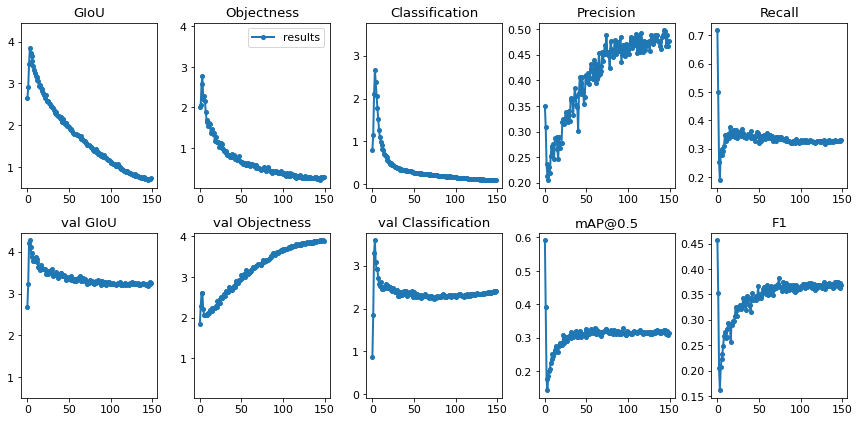

In [34]:
utils.plot_results()  # baseline

## Test Baseline

In [35]:
!python3 ML_test.py --weight weights/ML_Final_Project/baseline.pt  # baseline

Namespace(augment=False, batch_size=16, cfg='cfg/yolov3-spp.cfg', conf_thres=0.001, data='data/tinycoco.data', device='', img_size=512, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/ML_Final_Project/baseline.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.29719e+07 parameters, 6.29719e+07 gradients
Caching labels (400 found, 0 missing, 0 empty, 0 duplicate, for 400 images): 100
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.497     0.338     0.329     0.382
              person       400  1.08e+03     0.654     0.655     0.636     0.655
             bicycle       400        40     0.725     0.475     0.421     0.574
                 car       400       202      0.56       0.5     0.467     0.528
          mot

## Detect Baseline

In [1]:
!python3 ML_detect.py --output my_result/ML_result/baseline/base_output  --weights weights/ML_Final_Project/baseline.pt # bri


Bad key "text.kerning_factor" on line 4 in
/home/hoiliu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='my_result/ML_result/baseline/base_output', save_txt=False, source='my_result/ML_result/input', view_img=False, weights='weights/ML_Final_Project/baseline.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/16 my_result/ML_result/input/COCO_val2014_000000000192.jpg: 384x512 4 persons, Done. (0.012s)
image 2/16 my_result/ML_result/input/COCO_

In [37]:
!python3 ML_detect.py --output my_result/ML_result/baseline/base_output  --weights weights/ML_Final_Project/baseline.pt # bri

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='my_result/ML_result/baseline/base_output', save_txt=False, source='my_result/ML_result/input', view_img=False, weights='weights/ML_Final_Project/baseline.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/15 my_result/ML_result/input/COCO_val2014_000000000192.jpg: 384x512 4 persons, Done. (0.012s)
image 2/15 my_result/ML_result/input/COCO_val2014_000000000872.jpg: 512x512 1 persons, Done. (0.014s)
image 3/15 my_result/ML_result/input/COCO_val2014_000000000885.jpg: 384x512 4 persons, 1 tennis rackets, Done. (0.012s)
image 4/15 my_result/ML_result/input/COCO_val2014_000000001000.jpg: 384x512 12 persons, 1 backpacks, 1 tennis rackets, Done. (0.014s)
image 5/15 my_res

# Brightness

## Train  brightness

In [19]:
!python3 ML_train.py --batch-size 4 --epoch=150 # bri

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/tinycoco.data', device='', epochs=150, evolve=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (3600 found, 0 missing, 0 empty, 0 duplicate, for 3600 images): 1
Caching labels (392 found, 0 missing, 0 empty, 0 duplicate, for 392 images): 100
Image sizes 320 - 640 train, 640 test
Using 4 dataloader workers
Starting training for 150 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size

    21/149     5.74G      2.32     0.805     0.344      3.47        50       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       392  3.48e+03      0.35     0.358       0.3     0.337

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    22/149     5.74G       2.2     0.783     0.323      3.31        26       640
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       392  3.48e+03     0.384     0.339     0.308     0.344

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    23/149     5.74G      2.19     0.816     0.312      3.31        31       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       392  3.48e+03     0.381     0.355     0.304     0.346

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    24/149     5.74G     

    71/149     5.74G      1.26      0.39     0.187      1.84        45       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       392  3.48e+03     0.502     0.292     0.299     0.348

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    72/149     5.74G      1.27     0.368     0.184      1.82        42       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       392  3.48e+03     0.489     0.308     0.305     0.361

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    73/149     5.74G      1.25     0.409     0.188      1.85        32       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       392  3.48e+03     0.513     0.299     0.304     0.354

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    74/149     5.74G     

   121/149     5.74G     0.668     0.208     0.112     0.988        54       320
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       392  3.48e+03     0.525     0.295     0.302     0.356

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   122/149     5.74G     0.679     0.257     0.114      1.05        50       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       392  3.48e+03     0.496     0.292     0.297     0.348

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   123/149     5.74G      0.66     0.234     0.109         1        14       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       392  3.48e+03     0.499      0.29     0.298     0.347

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   124/149     5.74G     

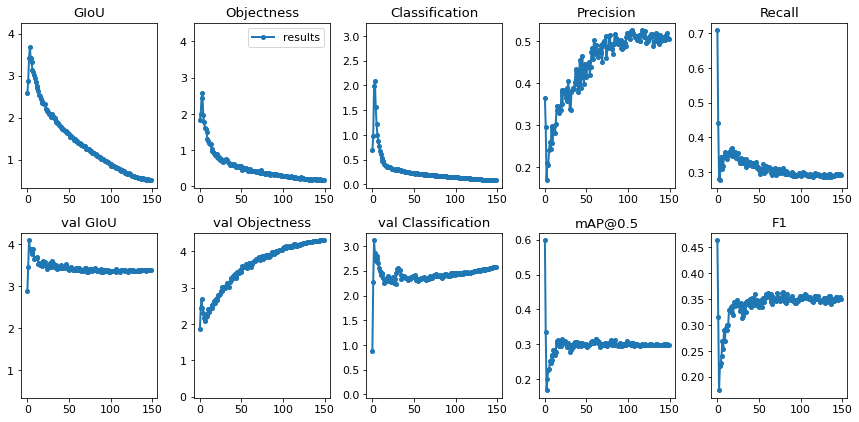

In [20]:
utils.plot_results()  # bri

## Test Brightness

In [21]:
!python3 ML_test.py  # bri

Namespace(augment=False, batch_size=16, cfg='cfg/yolov3-spp.cfg', conf_thres=0.001, data='data/tinycoco.data', device='', img_size=512, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/ML_Final_Project/bri.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.29719e+07 parameters, 6.29719e+07 gradients
Reading image shapes: 100%|████████████████| 400/400 [00:00<00:00, 15957.78it/s]
Caching labels (400 found, 0 missing, 0 empty, 0 duplicate, for 400 images): 100
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.532     0.288     0.302     0.353
              person       400  1.08e+03     0.694     0.622     0.616     0.656
             bicycle       400        40     0.829     0.364     0.385     0.506
                 c

## Detect Brightness

In [29]:
!python3 ML_detect.py --output my_result/ML_result/bri/bri_output  --weights weights/ML_Final_Project/bri.pt # bri

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='my_result/ML_result/bri/bri_output', save_txt=False, source='my_result/ML_result/input', view_img=False, weights='weights/ML_Final_Project/bri.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/15 my_result/ML_result/input/COCO_val2014_000000000192.jpg: 384x512 4 persons, 1 handbags, Done. (0.012s)
image 2/15 my_result/ML_result/input/COCO_val2014_000000000872.jpg: 512x512 2 persons, Done. (0.012s)
image 3/15 my_result/ML_result/input/COCO_val2014_000000000885.jpg: 384x512 6 persons, 1 sports balls, 1 tennis rackets, Done. (0.011s)
image 4/15 my_result/ML_result/input/COCO_val2014_000000001000.jpg: 384x512 11 persons, 1 backpacks, 1 tennis rackets, Done. (0.011s)


In [4]:
!python3 ML_detect.py --output my_result/ML_result/bri/bri_output  --weights weights/ML_Final_Project/bri.pt # bri


Bad key "text.kerning_factor" on line 4 in
/home/hoiliu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='my_result/ML_result/bri/bri_output', save_txt=False, source='my_result/ML_result/input', view_img=False, weights='weights/ML_Final_Project/bri.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/16 my_result/ML_result/input/COCO_val2014_000000000192.jpg: 384x512 4 persons, 1 handbags, Done. (0.012s)
image 2/16 my_result/ML_result/input/COCO

# Rotate

## Train Rotate 

In [43]:
!python3 ML_train.py --batch-size 4 --epoch=150 # Rotate

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/tinycoco.data', device='', epochs=150, evolve=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (3600 found, 0 missing, 0 empty, 0 duplicate, for 3600 images): 1
Caching labels (400 found, 0 missing, 0 empty, 0 duplicate, for 400 images): 100
Image sizes 320 - 640 train, 640 test
Using 4 dataloader workers
Starting training for 150 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size

    21/149     5.74G      2.98      1.45     0.778      5.21        22       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.276     0.359     0.287     0.295

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    22/149     5.74G      2.92      1.43     0.711      5.06        54       640
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.308      0.35     0.287     0.312

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    23/149     5.74G      2.89      1.49     0.728      5.11        24       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.258     0.364     0.273     0.283

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    24/149     5.74G     

    71/149     5.74G      1.75     0.601     0.215      2.56        43       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.393     0.337     0.308     0.348

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    72/149     5.74G      1.73     0.564     0.211      2.51        11       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.428     0.327     0.309     0.357

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    73/149     5.74G      1.73     0.625     0.212      2.57        56       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.398     0.331     0.303     0.347

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    74/149     5.74G     

   121/149     5.74G         1     0.321     0.114      1.44        57       320
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.452     0.323      0.31     0.361

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   122/149     5.74G      1.03     0.391     0.119      1.54        56       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.431     0.327     0.304     0.354

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   123/149     5.74G     0.999      0.36     0.115      1.47        40       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.441      0.33     0.306      0.36

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   124/149     5.74G     

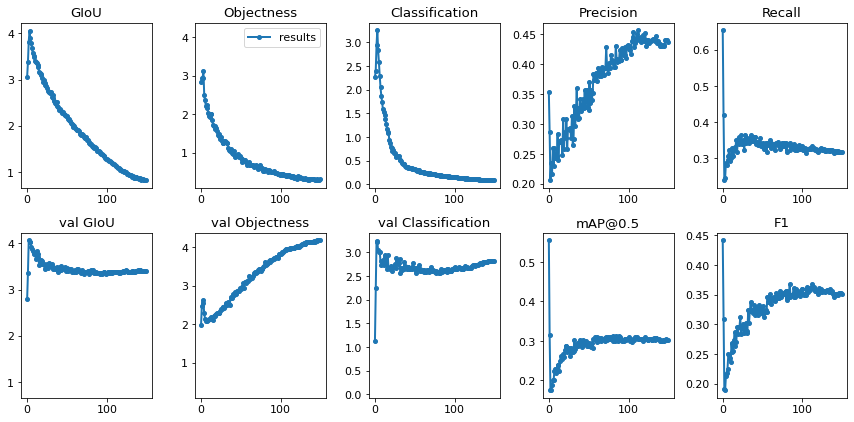

In [44]:
utils.plot_results()  # rotate

## Test Rotate

In [45]:
!python3 ML_test.py --weight weights/ML_Final_Project/rot.pt  # rotate

Namespace(augment=False, batch_size=16, cfg='cfg/yolov3-spp.cfg', conf_thres=0.001, data='data/tinycoco.data', device='', img_size=512, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/ML_Final_Project/rot.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.29719e+07 parameters, 6.29719e+07 gradients
Caching labels (400 found, 0 missing, 0 empty, 0 duplicate, for 400 images): 100
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.479     0.318     0.311     0.367
              person       400  1.08e+03     0.617     0.605     0.597     0.611
             bicycle       400        40     0.553     0.475     0.387     0.511
                 car       400       202      0.52     0.499     0.475     0.509
          motorcyc

## Detect Rotate

In [46]:
!python3 ML_detect.py --output my_result/ML_result/rot/rot_output  --weights weights/ML_Final_Project/rot.pt # bri

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='my_result/ML_result/rot/rot_output', save_txt=False, source='my_result/ML_result/input', view_img=False, weights='weights/ML_Final_Project/rot.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/15 my_result/ML_result/input/COCO_val2014_000000000192.jpg: 384x512 4 persons, Done. (0.012s)
image 2/15 my_result/ML_result/input/COCO_val2014_000000000872.jpg: 512x512 1 persons, Done. (0.015s)
image 3/15 my_result/ML_result/input/COCO_val2014_000000000885.jpg: 384x512 4 persons, 1 sports balls, 1 tennis rackets, Done. (0.012s)
image 4/15 my_result/ML_result/input/COCO_val2014_000000001000.jpg: 384x512 10 persons, 1 tennis rackets, Done. (0.014s)
image 5/15 my_result/ML_r

# Resize

## Train Resize 

In [68]:
!python3 ML_train.py --batch-size 4 --epoch=150  # Resize

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/tinycoco.data', device='', epochs=150, evolve=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (3600 found, 0 missing, 0 empty, 0 duplicate, for 3600 images): 1
Caching labels (400 found, 0 missing, 0 empty, 0 duplicate, for 400 images): 100
Image sizes 320 - 640 train, 640 test
Using 4 dataloader workers
Starting training for 150 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size

    21/149     5.74G      2.38     0.921     0.354      3.65        45       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.366     0.351     0.309      0.34

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    22/149     5.74G      2.32     0.903      0.35      3.58        47       640
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.375     0.346     0.313     0.341

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    23/149     5.74G      2.36     0.933     0.358      3.65        35       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.346     0.361     0.313     0.335

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    24/149     5.74G     

    71/149     5.74G       1.4     0.442     0.194      2.04        50       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.478     0.312      0.31     0.359

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    72/149     5.74G      1.37     0.422     0.185      1.98        70       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.475     0.312     0.317     0.364

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    73/149     5.74G      1.41     0.467      0.19      2.07        27       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.446     0.319     0.309     0.356

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    74/149     5.74G     

   121/149     5.74G     0.782     0.242     0.109      1.13        57       320
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.501     0.306     0.306     0.364

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   122/149     5.74G     0.805     0.298     0.117      1.22        20       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.483     0.308     0.303      0.36

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   123/149     5.74G     0.781      0.27     0.111      1.16        41       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.488     0.306     0.306     0.361

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   124/149     5.74G     

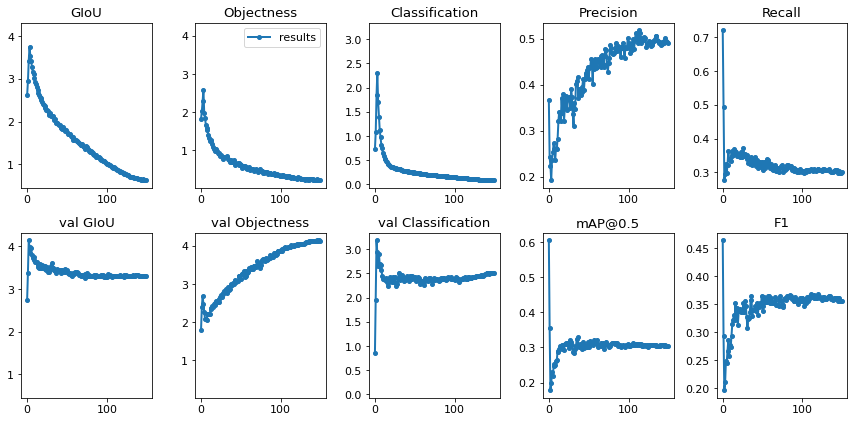

In [69]:
utils.plot_results()  # Resize

In [67]:
!python3 ML_train.py --batch-size 4 --epoch=150  # Resize and augment

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/tinycoco.data', device='', epochs=150, evolve=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (3600 found, 0 missing, 0 empty, 0 duplicate, for 3600 images): 1
Caching labels (400 found, 0 missing, 0 empty, 0 duplicate, for 400 images): 100
Image sizes 320 - 640 train, 640 test
Using 4 dataloader workers
Starting training for 150 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size

    21/149     5.74G      2.66      2.54     0.909      6.11        34       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.345     0.384     0.328     0.343

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    22/149     5.74G      2.63      2.57     0.875      6.07        51       640
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.347      0.38     0.335     0.342

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    23/149     5.74G      2.63      2.75      0.89      6.27        63       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.327     0.375     0.309     0.329

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    24/149     5.74G     

    71/149     5.74G      2.03       1.9     0.446      4.38        88       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.372     0.358      0.32     0.351

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    72/149     5.74G      1.99      1.82     0.437      4.25        70       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.394     0.365     0.325     0.364

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    73/149     5.74G      2.02      2.02     0.454      4.49        20       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.378     0.382     0.328     0.366

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    74/149     5.74G     

   121/149     5.74G      1.55      1.43     0.242      3.22        30       320
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03      0.46     0.352     0.338     0.382

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   122/149     5.74G      1.59      1.72      0.28      3.59        35       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.449     0.349      0.33     0.374

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   123/149     5.74G      1.57      1.59     0.269      3.42        44       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03      0.44     0.349     0.329     0.373

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   124/149     5.74G     

## Test Resize  

In [70]:
!python3 ML_test.py --weight weights/ML_Final_Project/res.pt  # mosaic and augment=True

Namespace(augment=False, batch_size=16, cfg='cfg/yolov3-spp.cfg', conf_thres=0.001, data='data/tinycoco.data', device='', img_size=512, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/ML_Final_Project/res.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.29719e+07 parameters, 6.29719e+07 gradients
Caching labels (400 found, 0 missing, 0 empty, 0 duplicate, for 400 images): 100
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.534     0.315     0.317     0.376
              person       400  1.08e+03     0.676     0.632     0.623     0.653
             bicycle       400        40     0.752      0.45     0.393     0.563
                 car       400       202     0.639     0.515     0.491      0.57
          motorcyc

## Detect Resize  

In [71]:
# res 
!python3 ML_detect.py --output my_result/ML_result/res/res_output  --weights weights/ML_Final_Project/res.pt 

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='my_result/ML_result/res/res_output', save_txt=False, source='my_result/ML_result/input', view_img=False, weights='weights/ML_Final_Project/res.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/15 my_result/ML_result/input/COCO_val2014_000000000192.jpg: 384x512 4 persons, Done. (0.010s)
image 2/15 my_result/ML_result/input/COCO_val2014_000000000872.jpg: 512x512 1 persons, Done. (0.011s)
image 3/15 my_result/ML_result/input/COCO_val2014_000000000885.jpg: 384x512 3 persons, 1 tennis rackets, Done. (0.010s)
image 4/15 my_result/ML_result/input/COCO_val2014_000000001000.jpg: 384x512 10 persons, 1 handbags, Done. (0.010s)
image 5/15 my_result/ML_result/input/COCO_val20

# Rect

## Train Rect

In [38]:
!python3 ML_train.py --batch-size 4 --epoch=150 --rect # rect

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/tinycoco.data', device='', epochs=150, evolve=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=True, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Reading image shapes: 100%|██████████████| 1800/1800 [00:00<00:00, 19069.30it/s]
Caching labels (1800 found, 0 missing, 0 empty, 0 duplicate, for 1800 images): 1
Caching labels (400 found, 0 missing, 0 empty, 0 duplicate, for 400 images): 100
Image sizes 320 - 640 train, 640 test
Using 4 dataloader workers
Starting training for 150 epochs...




     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    21/149     6.64G      2.61      1.29     0.437      4.34        20       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.346     0.309     0.277     0.304

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    22/149     6.64G      2.59      1.25     0.421      4.26        20       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.397     0.316     0.287     0.327

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    23/149     6.64G      2.54      1.17     0.409      4.11        20       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.329     0.324     0.276     0.309

     Epoch   gpu_mem    

    46/149     6.64G      1.95     0.771     0.285      3.01        20       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.459     0.329     0.315     0.365

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    47/149     6.64G      1.96     0.872     0.291      3.12        20       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.402     0.315     0.291     0.339

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    48/149     6.64G      1.86     0.698     0.265      2.83        20       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.399     0.313      0.29     0.336

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    49/149     6.64G     

    96/149     6.64G      1.11      0.45     0.178      1.74        20       320
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.507     0.295       0.3     0.357

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    97/149     6.64G      1.11     0.449     0.175      1.74        20       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.527     0.291     0.302      0.36

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    98/149     6.64G      1.11     0.497     0.176      1.78        20       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.495     0.289     0.298     0.349

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    99/149     6.64G     

   146/149     6.64G     0.671     0.335     0.125      1.13        20       320
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.471     0.293     0.294     0.347

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   147/149     6.64G     0.656     0.319     0.125       1.1        20       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03      0.48     0.296     0.299     0.352

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   148/149     6.64G     0.648     0.326     0.126       1.1        20       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03      0.45     0.292      0.29     0.341

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   149/149     6.64G     

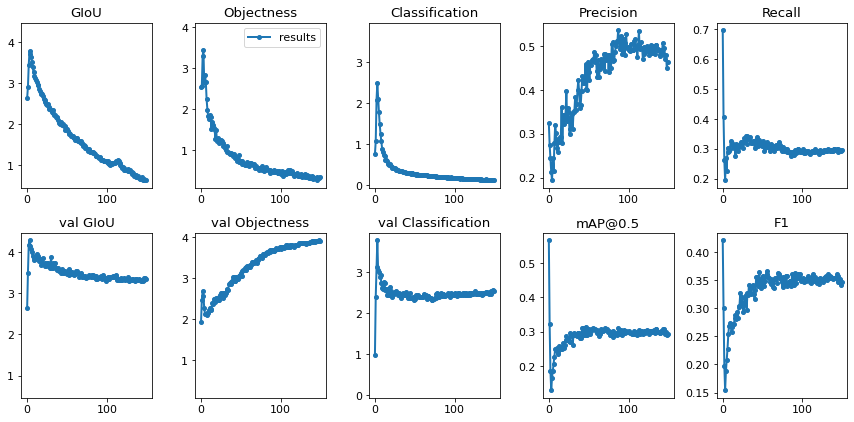

In [39]:
utils.plot_results()  # rect

In [47]:
!python3 ML_train.py --batch-size 4 --epoch=150 --rect # rect and augment=True

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/tinycoco.data', device='', epochs=150, evolve=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=True, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (1800 found, 0 missing, 0 empty, 0 duplicate, for 1800 images): 1
Caching labels (400 found, 0 missing, 0 empty, 0 duplicate, for 400 images): 100
Image sizes 320 - 640 train, 640 test
Using 4 dataloader workers
Starting training for 150 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size


    21/149     6.64G      2.92      1.82      0.59      5.33        20       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.301     0.313     0.254     0.284

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    22/149     6.64G      2.89      1.77     0.594      5.25        20       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.309     0.331     0.276     0.296

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    23/149     6.64G      2.85      1.66     0.554      5.06        20       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.313     0.331     0.262     0.304

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    24/149     6.64G     

    71/149     6.64G       1.8     0.768     0.232       2.8        20       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.438     0.324     0.314     0.357

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    72/149     6.64G      1.79     0.775     0.221      2.79        20       640
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.424      0.32     0.318     0.352

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    73/149     6.64G      1.77     0.709     0.223       2.7        20       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03      0.44     0.319     0.309     0.354

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    74/149     6.64G     

   121/149     6.64G      1.14     0.507     0.137      1.78        20       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.439     0.322     0.312      0.36

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   122/149     6.64G      1.12     0.479     0.133      1.73        20       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03      0.44     0.329     0.318     0.364

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   123/149     6.64G       1.1     0.461     0.128      1.69        20       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.441     0.322     0.315     0.359

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   124/149     6.64G     

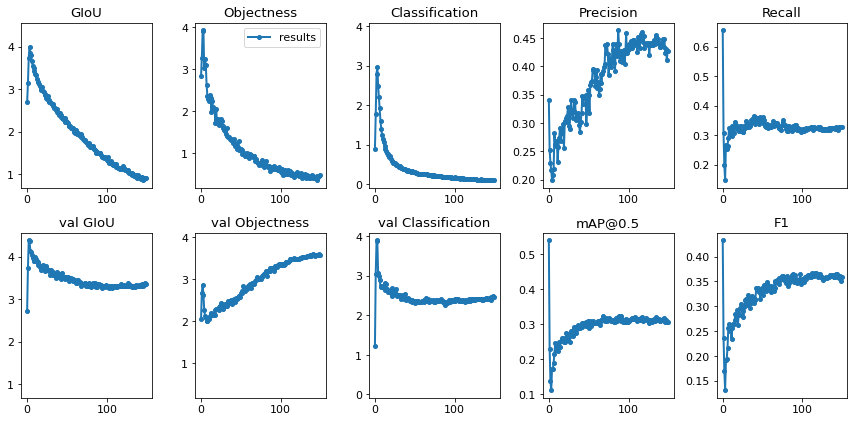

In [48]:
utils.plot_results()  # rect and augment=True

## Test Rect

In [40]:
!python3 ML_test.py --weight weights/ML_Final_Project/rect.pt  # rect

Namespace(augment=False, batch_size=16, cfg='cfg/yolov3-spp.cfg', conf_thres=0.001, data='data/tinycoco.data', device='', img_size=512, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/ML_Final_Project/rect.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.29719e+07 parameters, 6.29719e+07 gradients
Caching labels (400 found, 0 missing, 0 empty, 0 duplicate, for 400 images): 100
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.501     0.302     0.308     0.362
              person       400  1.08e+03     0.664     0.614     0.618     0.638
             bicycle       400        40     0.642      0.35     0.378     0.453
                 car       400       202     0.705     0.556     0.531     0.621
          motorcy

In [51]:
!python3 ML_test.py --weight weights/ML_Final_Project/rect_augment.pt  # rect and augment=True

Namespace(augment=False, batch_size=16, cfg='cfg/yolov3-spp.cfg', conf_thres=0.001, data='data/tinycoco.data', device='', img_size=512, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/ML_Final_Project/rect_augment.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.29719e+07 parameters, 6.29719e+07 gradients
Caching labels (400 found, 0 missing, 0 empty, 0 duplicate, for 400 images): 100
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.443     0.337     0.329     0.373
              person       400  1.08e+03     0.588     0.641     0.625     0.613
             bicycle       400        40     0.606     0.425     0.441       0.5
                 car       400       202      0.57     0.515     0.503     0.541
         

## Detect Rect

In [41]:
# rect 
!python3 ML_detect.py --output my_result/ML_result/rect/rect_output  --weights weights/ML_Final_Project/rect.pt 

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='my_result/ML_result/rect/rect_output', save_txt=False, source='my_result/ML_result/input', view_img=False, weights='weights/ML_Final_Project/rect.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/15 my_result/ML_result/input/COCO_val2014_000000000192.jpg: 384x512 4 persons, Done. (0.012s)
image 2/15 my_result/ML_result/input/COCO_val2014_000000000872.jpg: 512x512 1 persons, Done. (0.015s)
image 3/15 my_result/ML_result/input/COCO_val2014_000000000885.jpg: 384x512 3 persons, 1 tennis rackets, Done. (0.012s)
image 4/15 my_result/ML_result/input/COCO_val2014_000000001000.jpg: 384x512 10 persons, 1 tennis rackets, Done. (0.014s)
image 5/15 my_result/ML_result/input/C

In [50]:
# rect and augment=True
!python3 ML_detect.py --output my_result/ML_result/rect_augment/rect_augment_output  --weights weights/ML_Final_Project/rect_augment.pt 

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='my_result/ML_result/rect_augment/rect_augment_output', save_txt=False, source='my_result/ML_result/input', view_img=False, weights='weights/ML_Final_Project/rect_augment.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/15 my_result/ML_result/input/COCO_val2014_000000000192.jpg: 384x512 4 persons, Done. (0.012s)
image 2/15 my_result/ML_result/input/COCO_val2014_000000000872.jpg: 512x512 1 persons, Done. (0.014s)
image 3/15 my_result/ML_result/input/COCO_val2014_000000000885.jpg: 384x512 3 persons, 1 sports balls, 1 tennis rackets, Done. (0.012s)
image 4/15 my_result/ML_result/input/COCO_val2014_000000001000.jpg: 384x512 9 persons, 1 tennis rackets, Done. (0.014s)

## mosaic

# Train mosaic

In [52]:
!python3 ML_train.py --batch-size 4 --epoch=150  # mosaic and augment=True

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/tinycoco.data', device='', epochs=150, evolve=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching labels (1800 found, 0 missing, 0 empty, 0 duplicate, for 1800 images): 1
Caching labels (400 found, 0 missing, 0 empty, 0 duplicate, for 400 images): 100
Image sizes 320 - 640 train, 640 test
Using 4 dataloader workers
Starting training for 150 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size

    21/149     5.74G      2.77      2.83      1.04      6.63        30       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.316     0.403     0.329     0.339

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    22/149     5.74G      2.77       2.9      1.09      6.76        77       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.323     0.399     0.332     0.338

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    23/149     5.74G      2.74      2.76      1.02      6.51        44       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.328     0.415     0.341     0.347

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    24/149     5.74G     

    71/149     5.74G      2.15      2.12      0.54      4.82        39       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.388     0.393     0.361     0.372

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    72/149     5.74G      2.13      2.12     0.513      4.76        52       640
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03      0.39     0.392     0.351     0.373

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    73/149     5.74G      2.13      2.05     0.522       4.7        60       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.384     0.405     0.357      0.38

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    74/149     5.74G     

   121/149     5.74G      1.67      1.78     0.317      3.76        66       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.431     0.384     0.354     0.389

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   122/149     5.74G      1.71       1.7     0.322      3.73        58       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.445     0.389     0.367     0.396

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   123/149     5.74G      1.63      1.58     0.289       3.5        36       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03      0.44     0.388     0.372     0.396

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   124/149     5.74G     

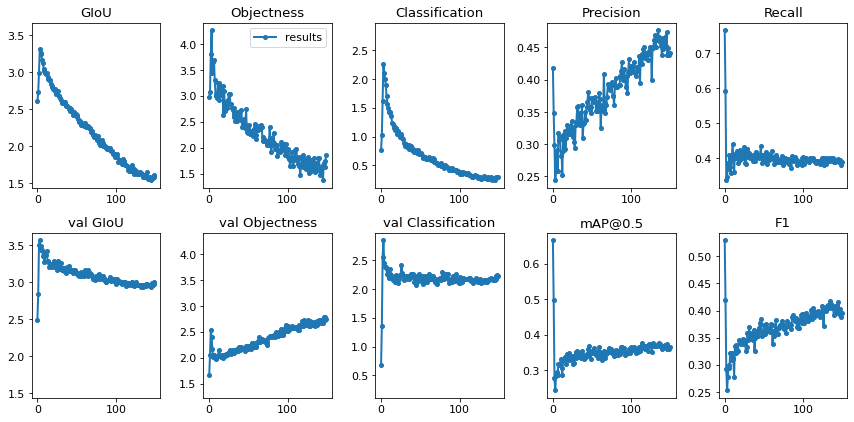

In [53]:
utils.plot_results()   # mosaic

# Test mosaic

In [64]:
!python3 ML_test.py --weight weights/ML_Final_Project/mosaic.pt  # mosaic and augment=True

Namespace(augment=False, batch_size=16, cfg='cfg/yolov3-spp.cfg', conf_thres=0.001, data='data/tinycoco.data', device='', img_size=512, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/ML_Final_Project/mosaic.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.29719e+07 parameters, 6.29719e+07 gradients
Caching labels (400 found, 0 missing, 0 empty, 0 duplicate, for 400 images): 100
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.454     0.392     0.376     0.406
              person       400  1.08e+03     0.593     0.716     0.686     0.649
             bicycle       400        40     0.522     0.525     0.443     0.524
                 car       400       202     0.521     0.624     0.579     0.568
          motor

# Detect mosaic

In [65]:
# mosaic and augment=True
!python3 ML_detect.py --output my_result/ML_result/mosaic/mosaic_output  --weights weights/ML_Final_Project/mosaic.pt

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='my_result/ML_result/mosaic/mosaic_output', save_txt=False, source='my_result/ML_result/input', view_img=False, weights='weights/ML_Final_Project/mosaic.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/15 my_result/ML_result/input/COCO_val2014_000000000192.jpg: 384x512 4 persons, 1 baseball gloves, Done. (0.012s)
image 2/15 my_result/ML_result/input/COCO_val2014_000000000872.jpg: 512x512 1 persons, 1 baseball gloves, Done. (0.014s)
image 3/15 my_result/ML_result/input/COCO_val2014_000000000885.jpg: 384x512 4 persons, 1 tennis rackets, Done. (0.012s)
image 4/15 my_result/ML_result/input/COCO_val2014_000000001000.jpg: 384x512 12 persons, 2 tennis rackets, Done. (0.

# Control augmentation

# Train control augmentation

In [7]:
!python3 ML_train.py --batch-size 4 --epoch=150  


Bad key "text.kerning_factor" on line 4 in
/home/hoiliu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/tinycoco.data', device='', epochs=150, evolve=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching label

    20/149     5.17G      2.73      3.01     0.983      6.72        50       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03       0.3     0.413     0.325     0.331

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    21/149     5.17G       2.7      2.87     0.931       6.5        20       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.347     0.404     0.351     0.354

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    22/149     5.17G      2.67      2.78     0.874      6.32        49       320
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.353     0.411     0.357     0.359

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    23/149     5.17G     

    70/149     5.17G      2.13      2.32     0.508      4.95        24       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03      0.37      0.38     0.342     0.361

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    71/149     5.17G      2.11      2.23     0.491      4.83        22       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.355     0.416     0.354     0.368

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    72/149     5.17G       2.1      2.27     0.483      4.85        33       640
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.377     0.395      0.35     0.373

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    73/149     5.17G     

   120/149     5.17G      1.63       1.8     0.285      3.72        12       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.443     0.385     0.365     0.397

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   121/149     5.17G      1.65      1.81     0.278      3.74        15       320
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.435     0.398     0.366     0.403

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   122/149     5.17G      1.62      1.67     0.267      3.56        40       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.445     0.393     0.372     0.403

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   123/149     5.17G     

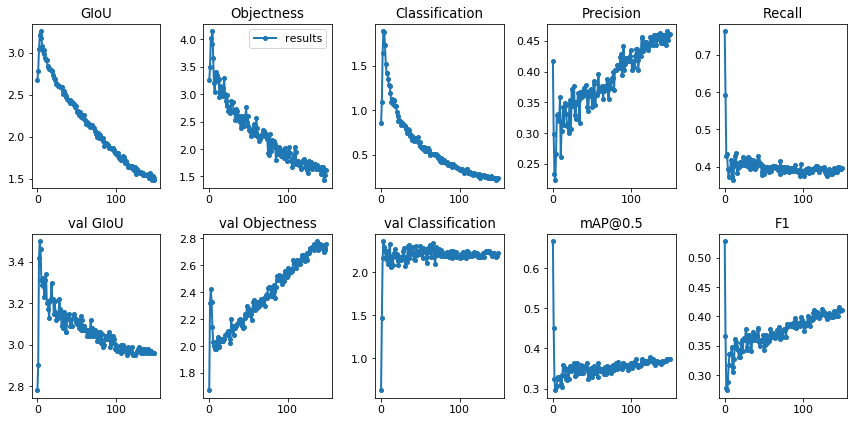

In [12]:
utils.plot_results()   

# Test control augmentation

In [13]:
!python3 ML_test.py --weight weights/ML_Final_Project/Control.pt  # Control


Bad key "text.kerning_factor" on line 4 in
/home/hoiliu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Namespace(augment=False, batch_size=16, cfg='cfg/yolov3-spp.cfg', conf_thres=0.001, data='data/tinycoco.data', device='', img_size=512, iou_thres=0.6, save_json=True, single_cls=False, task='test', weights='weights/ML_Final_Project/Control.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Fusing layers...
Model Summary: 152 layers, 6.29719e+07 parameters, 6.29719e+07 gradients
Caching labels (400 found, 0 missing, 0 empty, 0 duplicate, for 400 images): 100
               Class    Images   Targets         P         R   mAP@0.5        F1
       

# Detect control augmentation

In [15]:
!python3 ML_detect.py --output my_result/ML_result/Control/Control_output  --weights weights/ML_Final_Project/Control.pt


Bad key "text.kerning_factor" on line 4 in
/home/hoiliu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-spp.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/coco.names', output='my_result/ML_result/Control/Control_output', save_txt=False, source='my_result/ML_result/input', view_img=False, weights='weights/ML_Final_Project/Control.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
image 1/16 my_result/ML_result/input/COCO_val2014_000000000192.jpg: 384x512 4 persons, Done. (0.010s)
image 2/16 my_result/ML_result/input/COCO

# Control augmentation2 

In [16]:
!python3 ML_train.py --batch-size 4 --epoch=150  


Bad key "text.kerning_factor" on line 4 in
/home/hoiliu/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Namespace(adam=False, batch_size=4, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/tinycoco.data', device='', epochs=150, evolve=False, img_size=[320, 640], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='GeForce RTX 2080 Ti', total_memory=11019MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Caching label

    20/149     5.16G      2.72      2.95     0.923      6.59        36       512
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.304     0.401     0.327     0.332

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    21/149     5.16G      2.67      2.71     0.883      6.26        30       448
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.346     0.392     0.328     0.343

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    22/149     5.16G      2.68      3.13     0.906      6.71        30       640
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.305     0.403     0.324     0.329

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    23/149     5.16G     

    70/149     5.17G      2.05      2.12     0.439      4.61        19       640
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.384     0.374     0.338     0.363

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    71/149     5.17G      2.05       2.1     0.451      4.59        19       576
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.371     0.381     0.331      0.36

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    72/149     5.17G      2.05      2.25     0.454      4.75        12       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.361     0.369     0.318     0.351

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
    73/149     5.17G     

   120/149     5.17G      1.59      1.75     0.256       3.6        42       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.399     0.372      0.34     0.371

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   121/149     5.17G      1.58      1.69     0.248      3.52        28       384
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.414     0.381     0.345     0.381

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   122/149     5.17G      1.58      1.65     0.248      3.48        28       320
               Class    Images   Targets         P         R   mAP@0.5        F1
                 all       400  3.54e+03     0.434      0.38     0.353     0.389

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
   123/149     5.17G     